# Initialize Notebook

**Scope of this notebook:** I will only proceed with importing the neccesary libraries and dataset to perform a quick EDA

In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg


In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Label,Gender,Age,MMSE,CDR,APOE,DIAGNOSIS,Unnamed: 7,ERC ASM,ERC CONTRAST,...,rh_superiorparietal_thickness,rh_superiortemporal_volume,rh_superiortemporal_thickness,rh_supramarginal_volume,rh_supramarginal_thickness,rh_temporalpole_volume,rh_temporalpole_thickness,rh_transversetemporal_volume,rh_transversetemporal_thickness,TOTAL_HIPPOCAMPUS_VOLUME
0,OAS30001,female,65.149895,30.0,0.0,23.0,Cognitively normal,NaN,0.108767,245.139997,...,2.175,8928,2.698,6622,2.369,1965,3.612,578,2.313,6861.9
1,OAS30002,male,67.206024,30.0,0.0,34.0,Cognitively normal,NaN,0.129492,221.932844,...,1.938,12989,2.883,9930,2.432,2774,3.540,961,2.588,7378.1
2,OAS30003,female,58.773440,30.0,0.0,33.0,Cognitively normal,NaN,0.133642,283.711655,...,2.181,10897,2.620,10879,2.493,2137,3.756,874,2.671,7983.5
3,OAS30004,female,55.096508,30.0,0.0,23.0,Cognitively normal,NaN,0.180788,231.188679,...,2.094,11493,2.530,8862,2.232,1918,3.309,792,1.834,8525.1
4,OAS30005,female,48.030117,29.0,0.0,33.0,Cognitively normal,NaN,0.118517,245.120671,...,2.105,12135,2.926,11602,2.609,2057,3.655,993,2.557,9320.5


In [3]:
dataset = dataset.drop(["Unnamed: 7"],axis=1)

In [4]:
dataset["ERCs_thicknessbaseline"] = dataset["rh_entorhinal_thickness"] + dataset["lh_entorhinal_thickness"]
dataset["ERCsVolumebaseline"] = dataset["rh_entorhinal_volume"] + dataset["lh_entorhinal_volume"]

In [5]:
columns = [
    "Gender", "Age", "DIAGNOSIS", "MMSE",
    "Hip ASM", "Hip Contrast", "Hip Correlation", "Hip Variance ", 
    "Hip Sum Average", "Hip Sum Variance", "Hip Entropy", "Hip Clusterhade",
    "ERC ASM", "ERC CONTRAST", "ERC CORRELATION", "ERC VARIANCE ", 
    "ERC SUM AVERAGE", "ERC SUM VARIANCE", "ERC ENTROPY", "ERC CLUSTER SHADE",
    "ERCs_thicknessbaseline",
    "ERCsVolumebaseline", "TOTAL_HIPPOCAMPUS_VOLUME"
]


In [6]:
dataset = dataset[columns]
dataset

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,female,65.149895,Cognitively normal,30.0,0.460200411,83.37129666,0.508610428,89.06630373,10.31846143,272.8939183,...,245.139997,0.385395,209.332939,41.129640,592.191757,3.234648,18110.527190,6.948,2826,6861.9
1,male,67.206024,Cognitively normal,30.0,0.329647269,149.7122651,0.328176378,109.8242096,13.76140257,289.5845731,...,221.932844,0.406722,197.689209,42.149774,568.823992,3.240436,23801.869010,7.090,3792,7378.1
2,female,58.773440,Cognitively normal,30.0,0.385797323,104.7693541,0.545985695,125.6787833,15.52117681,397.9457789,...,283.711655,0.336695,217.002950,41.289080,584.300146,3.069283,17579.374770,6.832,2964,7983.5
3,female,55.096508,Cognitively normal,30.0,0.229011059,166.9534306,0.27560138,112.1868343,18.12678643,281.7939065,...,231.188679,0.498026,232.827358,33.062621,700.120751,3.093719,4888.606116,6.523,3184,8525.1
4,female,48.030117,Cognitively normal,29.0,0.24291323,86.8162215,0.377438554,73.48465063,13.46392035,207.122381,...,245.120671,0.458936,233.016858,44.574015,686.946759,3.149858,22134.931110,8.253,3419,9320.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,male,51.520878,Cognitively normal,30.0,0.241905071,185.9517258,0.26081542,119.7282993,20.4719512,292.9614715,...,211.115923,0.541205,229.997956,29.612012,708.875901,3.026495,-1155.195119,7.339,4268,8947.8
745,male,65.171800,Cognitively normal,28.0,0.460262312,110.9184814,0.380646123,84.41390623,11.36978687,226.7371435,...,247.267295,0.481906,238.429315,32.328782,706.449967,3.072458,1949.812723,6.363,3880,7373.2
746,female,62.965090,Cognitively normal,29.0,0.456332442,87.97432739,0.494138979,102.0331982,10.98650287,320.1584654,...,252.115540,0.435960,221.698071,38.821700,634.676744,3.122909,14482.990380,6.368,3310,6828.5
747,female,64.774810,Unc: ques. Impairment,27.0,0.165,478.2875,-0.201970198,200.5570312,23.4375,323.940625,...,253.821524,0.432143,225.827181,27.061909,649.487198,2.661899,-2314.065889,5.174,2044,4501.3


## Data Inspection

In [7]:
# Check column names in case 
# we need to do some spelling correction
dataset.columns

Index(['Gender', 'Age', 'DIAGNOSIS', 'MMSE', 'Hip ASM', 'Hip Contrast',
       'Hip Correlation', 'Hip Variance ', 'Hip Sum Average',
       'Hip Sum Variance', 'Hip Entropy', 'Hip Clusterhade', 'ERC ASM',
       'ERC CONTRAST', 'ERC CORRELATION', 'ERC VARIANCE ', 'ERC SUM AVERAGE',
       'ERC SUM VARIANCE', 'ERC ENTROPY', 'ERC CLUSTER SHADE',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'TOTAL_HIPPOCAMPUS_VOLUME'],
      dtype='object')

In [8]:
dataset.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            749 non-null    object
 1   DIAGNOSIS         747 non-null    object
 2   Hip ASM           749 non-null    object
 3   Hip Contrast      749 non-null    object
 4   Hip Correlation   749 non-null    object
 5   Hip Variance      749 non-null    object
 6   Hip Sum Average   749 non-null    object
 7   Hip Sum Variance  749 non-null    object
 8   Hip Entropy       749 non-null    object
 9   Hip Clusterhade   749 non-null    object
dtypes: object(10)
memory usage: 58.6+ KB


In [9]:
cols_to_convert = ['Hip Contrast', 'Hip ASM', 'Hip Correlation', 'Hip Variance ', 
                   'Hip Sum Average', 'Hip Sum Variance', 'Hip Entropy', 'Hip Clusterhade']

for col in cols_to_convert:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

In [10]:
dataset["Gender"] = dataset["Gender"].map({'female': 0, 'male': 1})

In [11]:
dataset["Gender"]

0      0
1      1
2      0
3      0
4      0
      ..
744    1
745    1
746    0
747    0
748    0
Name: Gender, Length: 749, dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    749 non-null    int64  
 1   Age                       749 non-null    float64
 2   DIAGNOSIS                 747 non-null    object 
 3   MMSE                      736 non-null    float64
 4   Hip ASM                   747 non-null    float64
 5   Hip Contrast              747 non-null    float64
 6   Hip Correlation           747 non-null    float64
 7   Hip Variance              747 non-null    float64
 8   Hip Sum Average           747 non-null    float64
 9   Hip Sum Variance          747 non-null    float64
 10  Hip Entropy               747 non-null    float64
 11  Hip Clusterhade           747 non-null    float64
 12  ERC ASM                   749 non-null    float64
 13  ERC CONTRAST              749 non-null    float64
 14  ERC CORREL

In [13]:
import numpy as np

diagnosis_mapping = {
    # 0 - Normal controls
    "Cognitively normal": 0,
    "No dementia": 0,

    # 1 - Mild Cognitive Impairment (MCI / uncertain)
    "uncertain dementia": 1,
    "0.5 in memory only": 1,
    "Unc: ques. Impairment": 1,
    "uncertain- possible NON AD dem": 1,

    # 2 - MCI Converters (transitioning to AD)
    "AD dem w/CVD contribut": 2,
    "AD dem w/depresss- contribut": 2,
    "AD dem w/oth (list B) contribut": 2,
    "AD dem w/PDI after AD dem contribut": 2,
    "AD dem/FLD prior to AD dem": 2,
    "AD dem Language dysf prior": 2,

    # 3 - Alzheimer's Disease and other dementias
    "AD Dementia": 3,
    "AD dem Language dysf after": 3,
    "AD dem w/depresss- not contribut": 3,
    "AD dem distrubed social- prior": 3,
    "AD dem w/CVD not contrib": 3,
    "Vascular Demt- primary": 3,
    "Frontotemporal demt. prim": 3,
    "AD dem Language dysf with": 3,
    "DAT": 3,
    "Dementia/PD- primary": 3,
    "AD dem w/oth (list B) not contrib": 3,
    "DLBD- primary": 3,
    "DLBD, primary": 3,
    "AD dem cannot be primary": 3,
    "AD dem w/oth unusual features/demt on": 3,
    "Non AD dem- Other primary": 3,
}

# Then replace
dataset["DIAGNOSIS"] = dataset["DIAGNOSIS"].replace(diagnosis_mapping)


In [14]:
dataset["DIAGNOSIS"].unique()

array([0, 1, 2, 3, nan, '.'], dtype=object)

In [15]:
# Drop rows where DIAGNOSIS is NaN or '.'
dataset = dataset[~dataset["DIAGNOSIS"].isin([np.nan, '.'])]

In [16]:
dataset["DIAGNOSIS"].unique()

array([0, 1, 2, 3], dtype=object)

In [17]:
dataset["DIAGNOSIS"] = dataset["DIAGNOSIS"].astype(int)

C:\Users\steve\AppData\Local\Temp\ipykernel_17764\34967248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["DIAGNOSIS"] = dataset["DIAGNOSIS"].astype(int)


In [18]:
# Check for nulls
dataset.isna().sum().sort_values(ascending=False) 

MMSE                        10
Hip ASM                      2
Hip Contrast                 2
Hip Correlation              2
Hip Sum Variance             2
Hip Sum Average              2
Hip Variance                 2
Hip Clusterhade              2
Hip Entropy                  2
DIAGNOSIS                    0
Gender                       0
Age                          0
ERC ASM                      0
ERC CONTRAST                 0
ERC CORRELATION              0
ERC VARIANCE                 0
ERC SUM AVERAGE              0
ERC SUM VARIANCE             0
ERC ENTROPY                  0
ERC CLUSTER SHADE            0
ERCs_thicknessbaseline       0
ERCsVolumebaseline           0
TOTAL_HIPPOCAMPUS_VOLUME     0
dtype: int64

<Axes: >

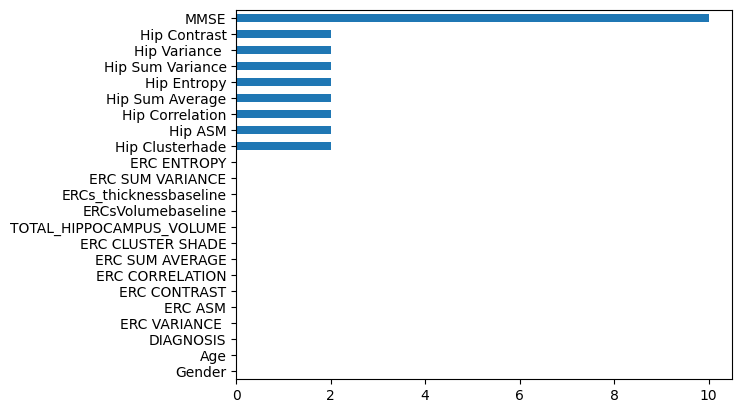

In [19]:
missing_data = dataset.isna().sum().sort_values()
missing_data.plot(kind='barh')

In [20]:
# Check for duplicated instances
dataset.duplicated().sum()

np.int64(0)

In [21]:
# Quick descriptive overview
dataset.describe(include = "all")

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
count,746.000000,746.000000,746.000000,736.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,0.454424,68.670536,0.722520,27.675272,0.412985,100.708001,0.482648,111.411195,14.098334,344.936780,...,251.045018,0.436716,225.402946,34.103420,650.566767,3.012379,6813.999860,6.406003,3210.647453,7109.631367
std,0.498253,9.066980,1.217083,3.539359,0.094918,78.542801,0.195306,22.992787,4.266376,89.681010,...,32.977273,0.081976,14.020532,5.381479,61.361237,0.228906,9033.289914,0.920498,705.216865,1231.323149
min,0.000000,45.185490,0.000000,7.000000,0.118298,28.042811,-0.597412,48.366313,7.193376,112.500000,...,171.080919,-0.070953,154.961986,21.073748,313.471204,2.172023,-4288.108246,3.200000,1307.000000,2728.800000
25%,0.000000,63.724846,0.000000,27.000000,0.351253,54.931038,0.414983,96.866341,11.704381,279.411924,...,228.960739,0.402088,218.554944,30.293043,625.984953,2.884230,821.723730,5.962250,2781.250000,6332.225000
50%,0.000000,68.893910,0.000000,29.000000,0.430127,82.149331,0.545802,110.715394,13.515363,353.421997,...,245.546329,0.452831,227.574671,33.065735,664.374671,3.035445,3503.964875,6.536000,3164.500000,7176.200000
75%,1.000000,74.471596,1.000000,30.000000,0.479648,120.727373,0.611231,124.957074,15.427247,414.563729,...,270.649778,0.493264,234.874824,37.484351,689.969948,3.171801,10096.127355,7.016250,3646.750000,7966.450000
max,1.000000,95.567420,3.000000,30.000000,0.676056,765.500000,0.748333,277.306858,60.500000,590.975677,...,424.328054,0.583185,256.835283,52.663876,784.455220,3.536395,57862.318540,9.176000,5425.000000,10549.600000


## Merging

In [22]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset_ADNI = pd.read_csv(dataset_path)
dataset_ADNI.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [23]:
dataset_ADNI = dataset_ADNI.drop(["RID"], axis=1)

In [24]:
dataset_ADNI

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,714.92,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,546.93,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,689.44,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,622.01,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,686.51,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1,75.6411,3,26.0,0.18,173.84,0.59,215.04,33.84,686.33,...,281.15,0.37,222.73,27.94,609.75,2.84,-1924.49,1.94,1112.0,2705.0
604,0,71.2712,3,21.0,0.22,174.02,0.58,211.07,30.56,670.24,...,224.78,0.47,205.49,27.36,597.20,2.77,1146.39,2.44,1526.0,2913.0
605,1,79.8548,3,23.0,0.19,199.31,0.56,229.63,33.13,719.20,...,220.41,0.48,214.97,27.16,639.47,2.79,-919.84,1.99,1215.0,2273.0
606,1,62.7452,3,24.0,0.05,142.05,0.50,147.12,46.21,446.42,...,217.38,0.51,220.55,32.54,664.84,3.09,5289.89,3.27,2321.0,3739.0


In [25]:
rename_dict = {
    'Ageatscreening': 'Age',
    'Diagnosis': 'DIAGNOSIS',
    'MMSE0m': 'MMSE',
    'HipsASMbaseline': 'Hip ASM',
    'HipsContrastbaseline': 'Hip Contrast',
    'HipsCorelationbaseline': 'Hip Correlation',
    'HipsVariancebaseline': 'Hip Variance ',
    'HipsSumAveragebaseline': 'Hip Sum Average',
    'HipsSumVariancebaseline': 'Hip Sum Variance',
    'HipsEntropybaseline': 'Hip Entropy',
    'HipsClusterShadebaseline': 'Hip Clusterhade',
    'ERCsASMbaseline': 'ERC ASM',
    'ERCsContrastbaseline': 'ERC CONTRAST',
    'ERCsCorelationbaseline': 'ERC CORRELATION',
    'ERCsVariancebaseline': 'ERC VARIANCE ',
    'ERCsSumAveragebaseline': 'ERC SUM AVERAGE',
    'ERCsSumVariancebaseline': 'ERC SUM VARIANCE',
    'ERCsEntropybaseline': 'ERC ENTROPY',
    'ERCsClusterShadebaseline': 'ERC CLUSTER SHADE',
    'HipposcampusVolumebaseline': 'TOTAL_HIPPOCAMPUS_VOLUME'
}

dataset_ADNI.rename(columns=rename_dict, inplace=True)

In [28]:
dataset_ADNI.columns

Index(['Gender', 'Age', 'DIAGNOSIS', 'MMSE', 'Hip ASM', 'Hip Contrast',
       'Hip Correlation', 'Hip Variance ', 'Hip Sum Average',
       'Hip Sum Variance', 'Hip Entropy', 'Hip Clusterhade', 'ERC ASM',
       'ERC CONTRAST', 'ERC CORRELATION', 'ERC VARIANCE ', 'ERC SUM AVERAGE',
       'ERC SUM VARIANCE', 'ERC ENTROPY', 'ERC CLUSTER SHADE',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'TOTAL_HIPPOCAMPUS_VOLUME'],
      dtype='object')

In [29]:
dataset = pd.concat([dataset, dataset_ADNI], axis=0, ignore_index=True)

In [30]:
dataset

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,0,65.149895,0,30.0,0.460200,83.371297,0.508610,89.066304,10.318461,272.893918,...,245.139997,0.385395,209.332939,41.129640,592.191757,3.234648,18110.527190,6.948,2826.0,6861.9
1,1,67.206024,0,30.0,0.329647,149.712265,0.328176,109.824210,13.761403,289.584573,...,221.932844,0.406722,197.689209,42.149774,568.823992,3.240436,23801.869010,7.090,3792.0,7378.1
2,0,58.773440,0,30.0,0.385797,104.769354,0.545986,125.678783,15.521177,397.945779,...,283.711655,0.336695,217.002950,41.289080,584.300146,3.069283,17579.374770,6.832,2964.0,7983.5
3,0,55.096508,0,30.0,0.229011,166.953431,0.275601,112.186834,18.126786,281.793906,...,231.188679,0.498026,232.827358,33.062621,700.120751,3.093719,4888.606116,6.523,3184.0,8525.1
4,0,48.030117,0,29.0,0.242913,86.816221,0.377439,73.484651,13.463920,207.122381,...,245.120671,0.458936,233.016858,44.574015,686.946759,3.149858,22134.931110,8.253,3419.0,9320.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,75.641100,3,26.0,0.180000,173.840000,0.590000,215.040000,33.840000,686.330000,...,281.150000,0.370000,222.730000,27.940000,609.750000,2.840000,-1924.490000,1.940,1112.0,2705.0
1350,0,71.271200,3,21.0,0.220000,174.020000,0.580000,211.070000,30.560000,670.240000,...,224.780000,0.470000,205.490000,27.360000,597.200000,2.770000,1146.390000,2.440,1526.0,2913.0
1351,1,79.854800,3,23.0,0.190000,199.310000,0.560000,229.630000,33.130000,719.200000,...,220.410000,0.480000,214.970000,27.160000,639.470000,2.790000,-919.840000,1.990,1215.0,2273.0
1352,1,62.745200,3,24.0,0.050000,142.050000,0.500000,147.120000,46.210000,446.420000,...,217.380000,0.510000,220.550000,32.540000,664.840000,3.090000,5289.890000,3.270,2321.0,3739.0


## Target analysis

Lets have a quick look at the target

In [31]:
dataset["DIAGNOSIS"].value_counts().sort_index()

DIAGNOSIS
0    722
1    253
2     93
3    286
Name: count, dtype: int64

<Axes: xlabel='DIAGNOSIS', ylabel='count'>

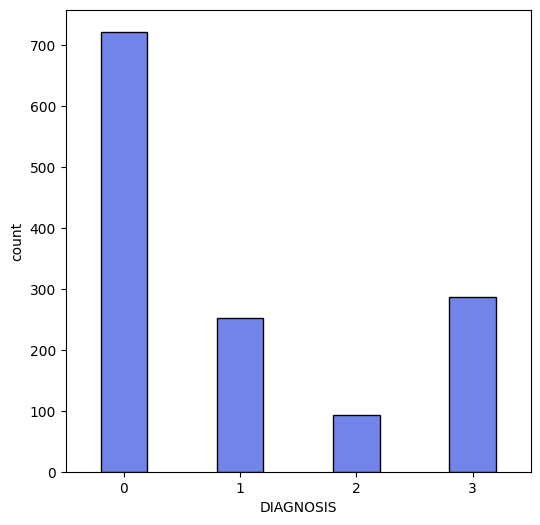

In [32]:
# Plot the target using a bar plot
plt.figure(figsize = (6,6))

sns.countplot(data = dataset, 
              x = dataset["DIAGNOSIS"].sort_index(),
              color = "#5e76fe",
              width = 0.4,
              edgecolor = "black",
)

*We can see at first glance that we have an imbalance dataset.*

**Lets have a closer look on whether our variables in the dataset do follow a normal distribution and its Skewness level.**

* We use the Shapiro-Wilk test to assess whether the data in each column follows a normal distribution. p-value: The probability that the data comes from a normal distribution. A p-value greater than 0.05 suggests the data is normal, while less than 0.05 suggests it is not normal.

* If skewness is 0, the data is perfectly symmetric. Negative skewness means the left tail is longer (data is skewed left), and positive skewness means the right tail is longer (data is skewed right).

* A kurtosis of 3 indicates a normal distribution. If kurtosis is greater than 3, it indicates heavier tails (leptokurtic), and if it's less than 3, it indicates lighter tails (platykurtic).

*In this case, scipy wouldnt allow me to work with null values, therefore, I had to drop them initially. This will be taken into consideration when performing data imputation and re-assess the dataset for completeness.*

In [33]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in dataset.columns:  
    stat, p = shapiro(dataset[column].dropna())
    skewness = skew(dataset[column].dropna())
    kurt = kurtosis(dataset[column].dropna())
    results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,Statistic,p-value,Skewness,Kurtosis,Normal
Gender,0.633547,0.0,0.183934,-1.966168,False
Age,0.98193,0.0,-0.498648,0.116893,False
DIAGNOSIS,0.72461,0.0,0.810449,-0.987127,False
MMSE,0.779752,0.0,-2.052523,5.726335,False
Hip ASM,0.899846,0.0,0.126839,-1.513555,False
Hip Contrast,0.831784,0.0,2.14954,15.05457,False
Hip Correlation,0.765774,0.0,-2.65382,10.378346,False
Hip Variance,0.921007,0.0,0.221932,-1.371143,False
Hip Sum Average,0.854404,0.0,0.302532,-1.5645,False
Hip Sum Variance,0.954155,0.0,0.044314,-1.178657,False


It appears that HipsContrastbaseline and ERCsEntropybaseline do indicate a normal distribution 

How about we visuallize them for clarity? Lets use histograms

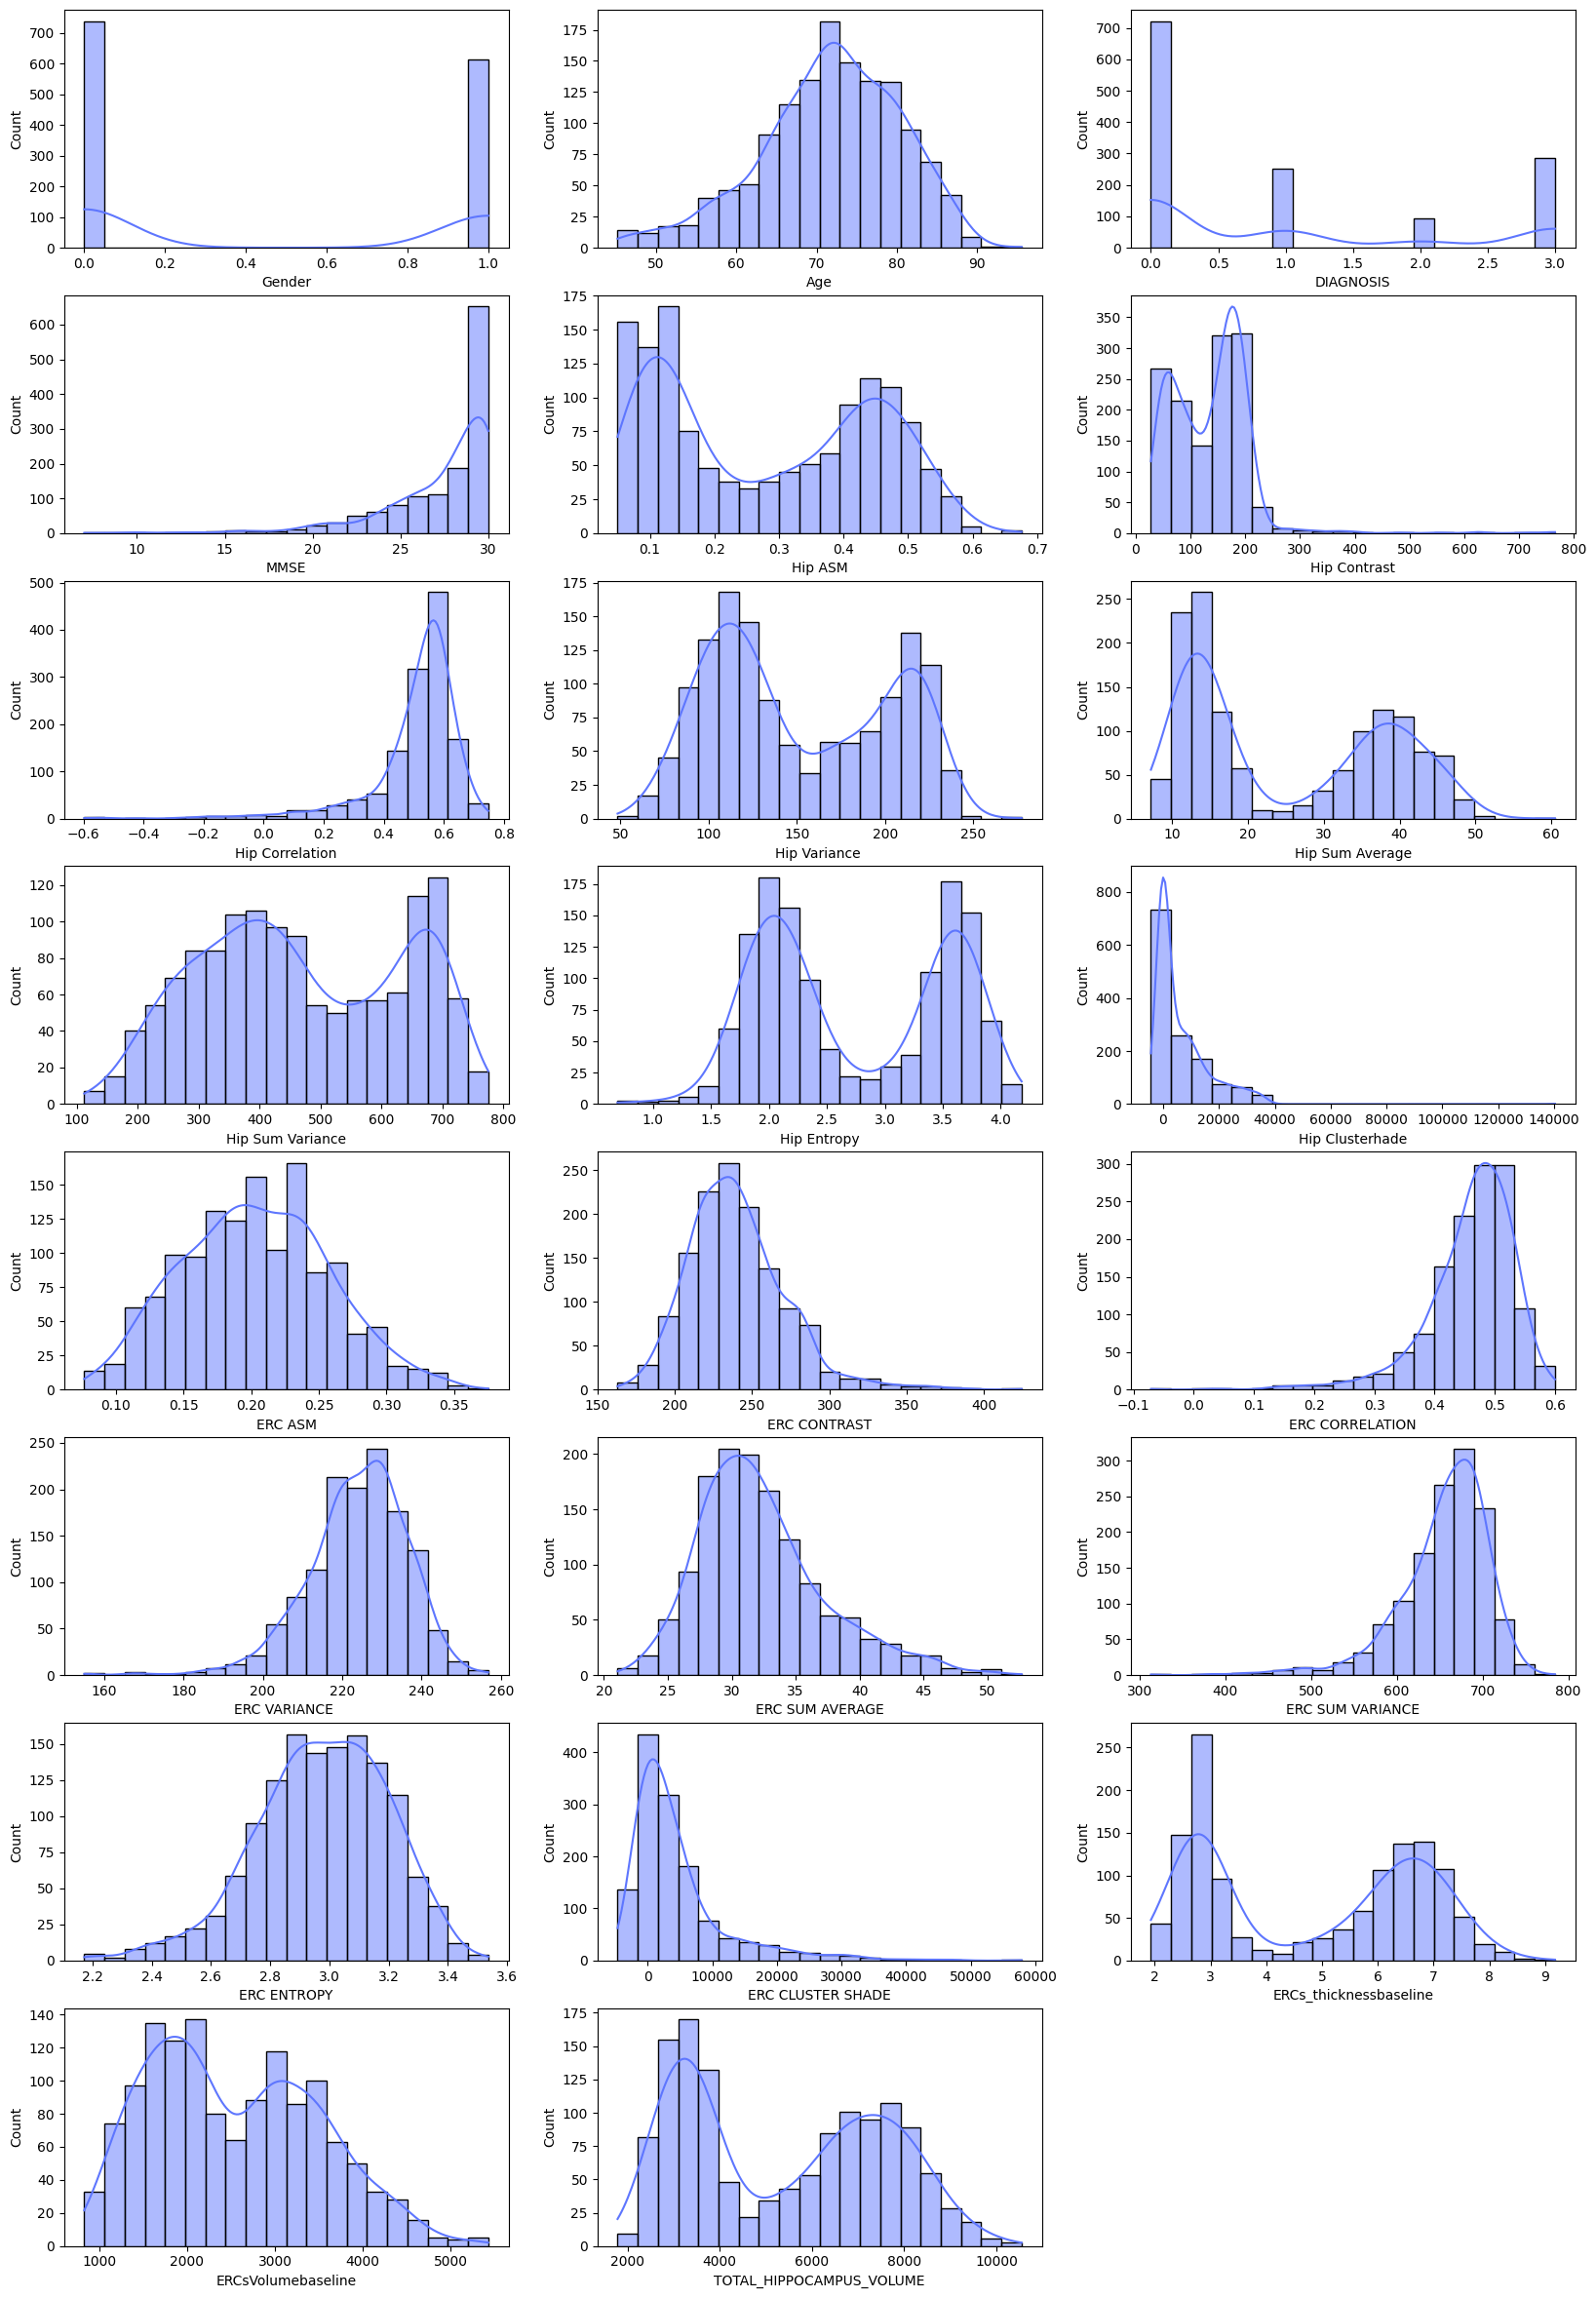

In [34]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(dataset[dataset.columns[i]], 
                 color="#5e76fe", 
                 kde = True,
                 edgecolor = "black",
                 bins=20)

Now we want to check for any outliers. How about we use boxplots?

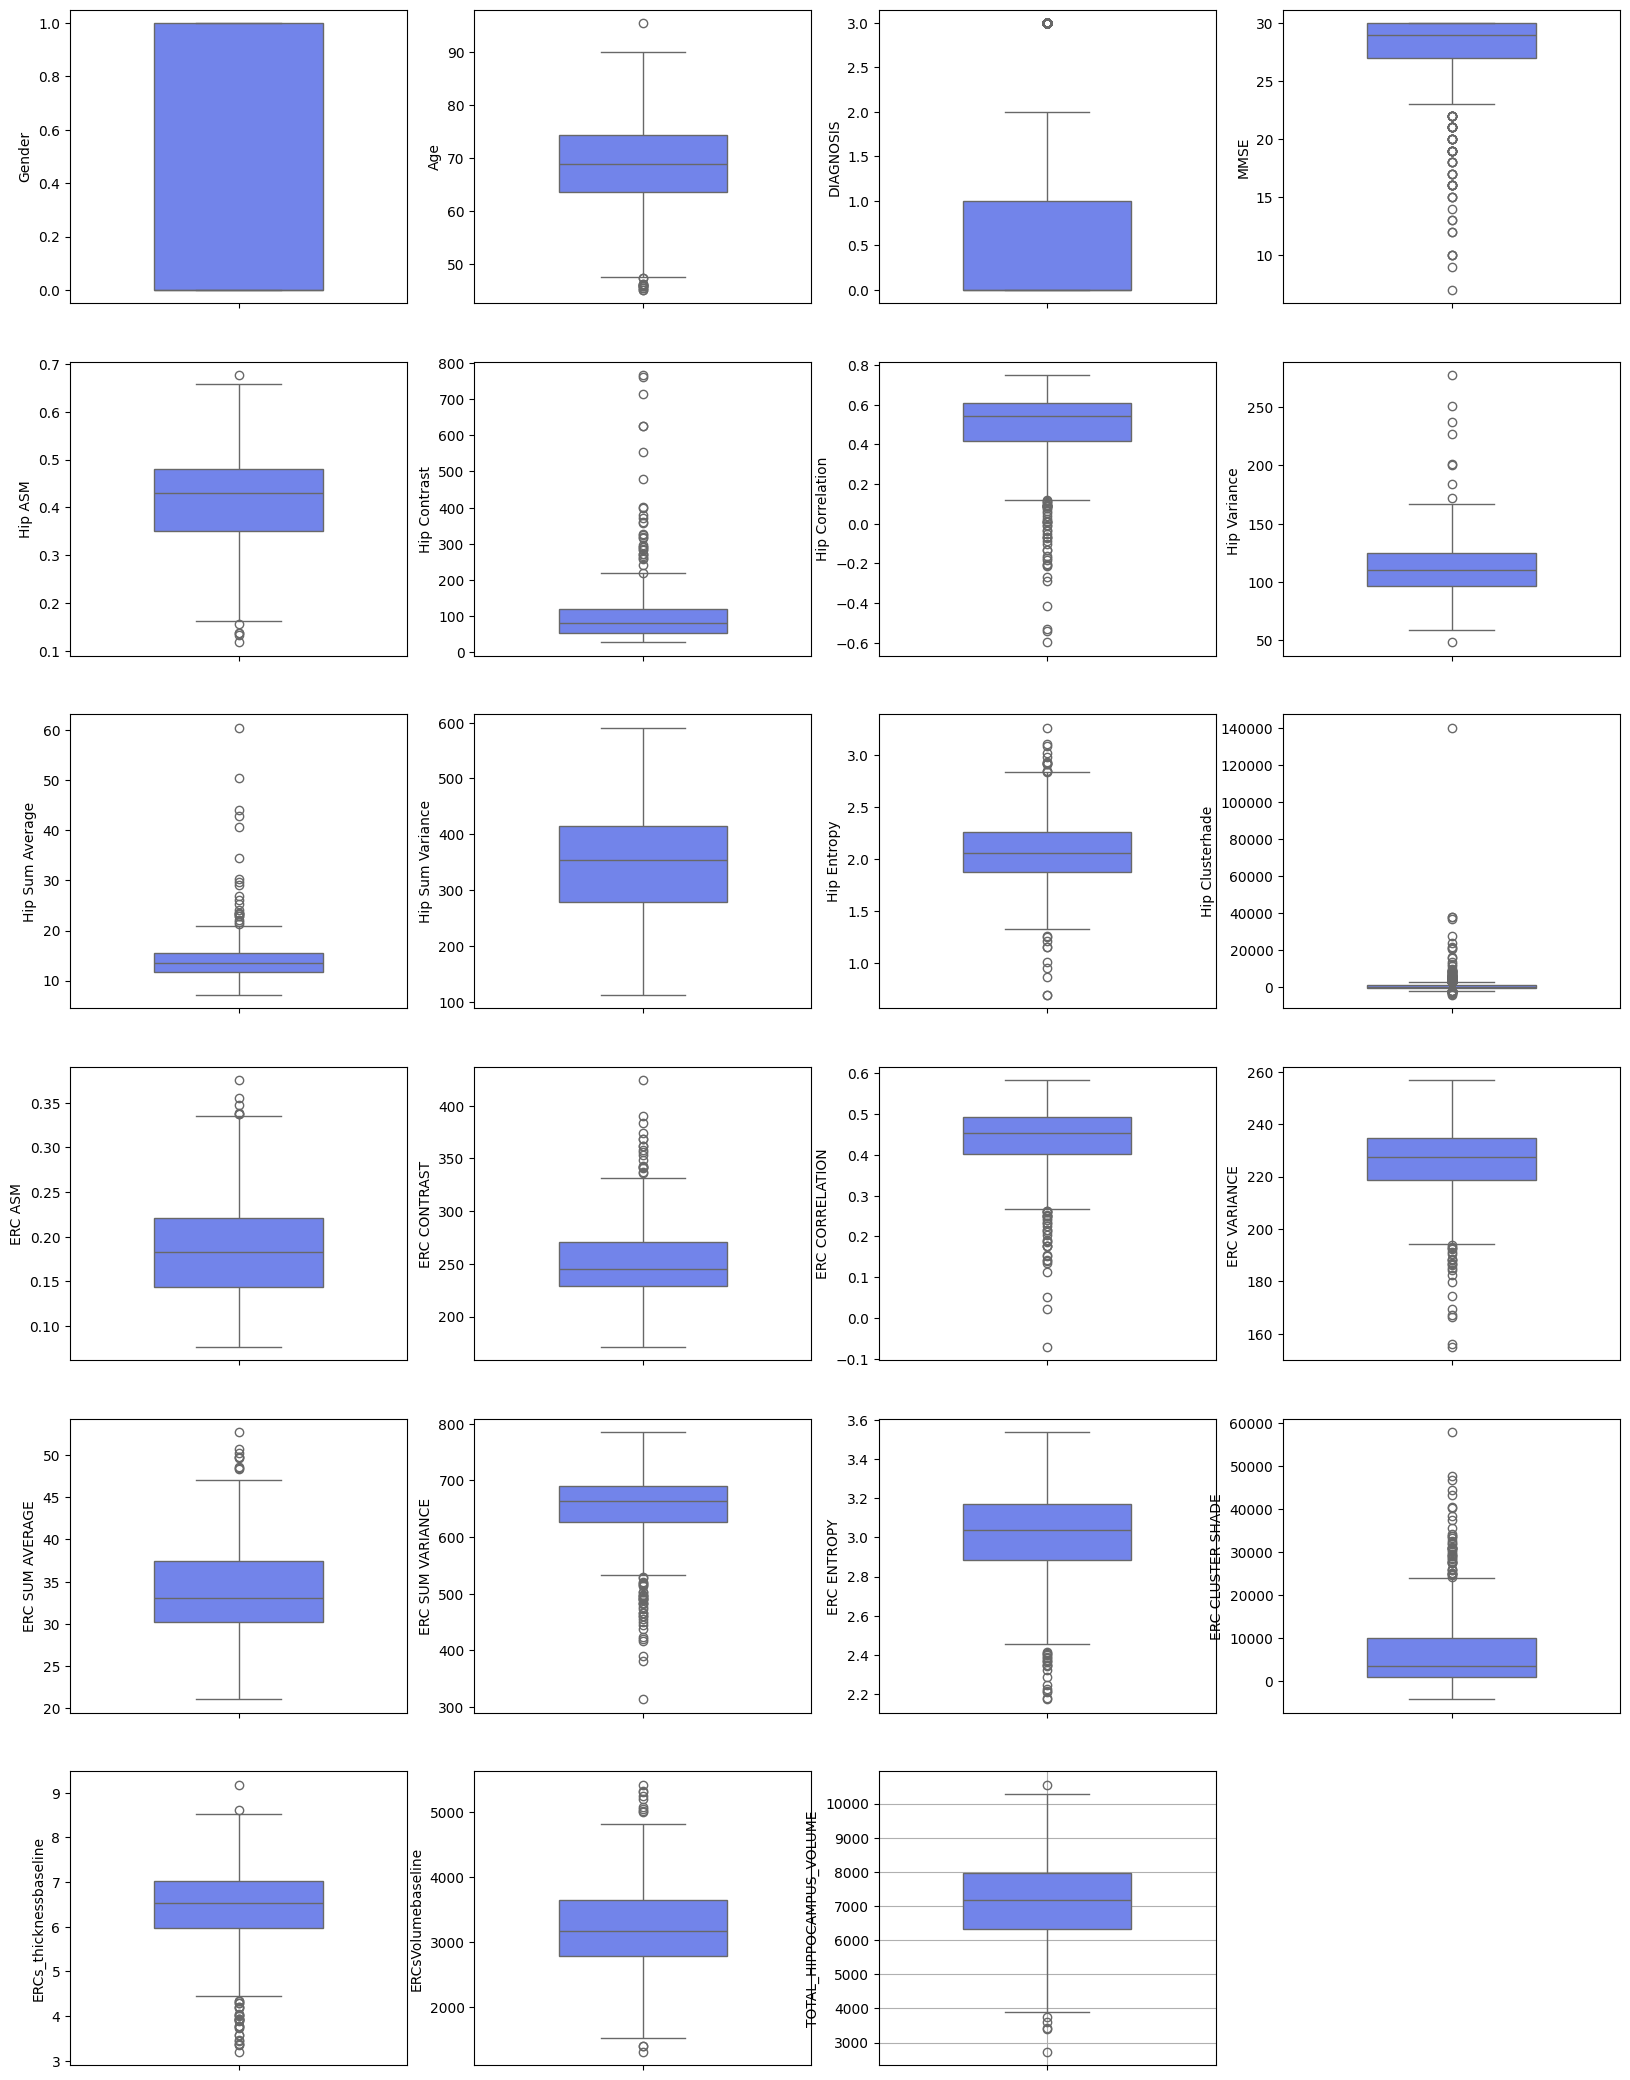

In [26]:
# Plot each column using boxplot
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10,4,i+1)
    sns.boxplot(dataset[dataset.columns[i]], 
                color="#5e76fe",
                width=.5)
plt.grid()

We can now better understand the spread of our dataset and detect a few outliers from here. 

How about we check the Q-Q plot for each variable? Perhaps we can have a much better comprehension if the data follows a normal distribution aside from relying on the above histogram.

Note: *Q-Q plots rely on the complete dataset to compute quantiles. Therefore, i had to drop a few values to see the red line*

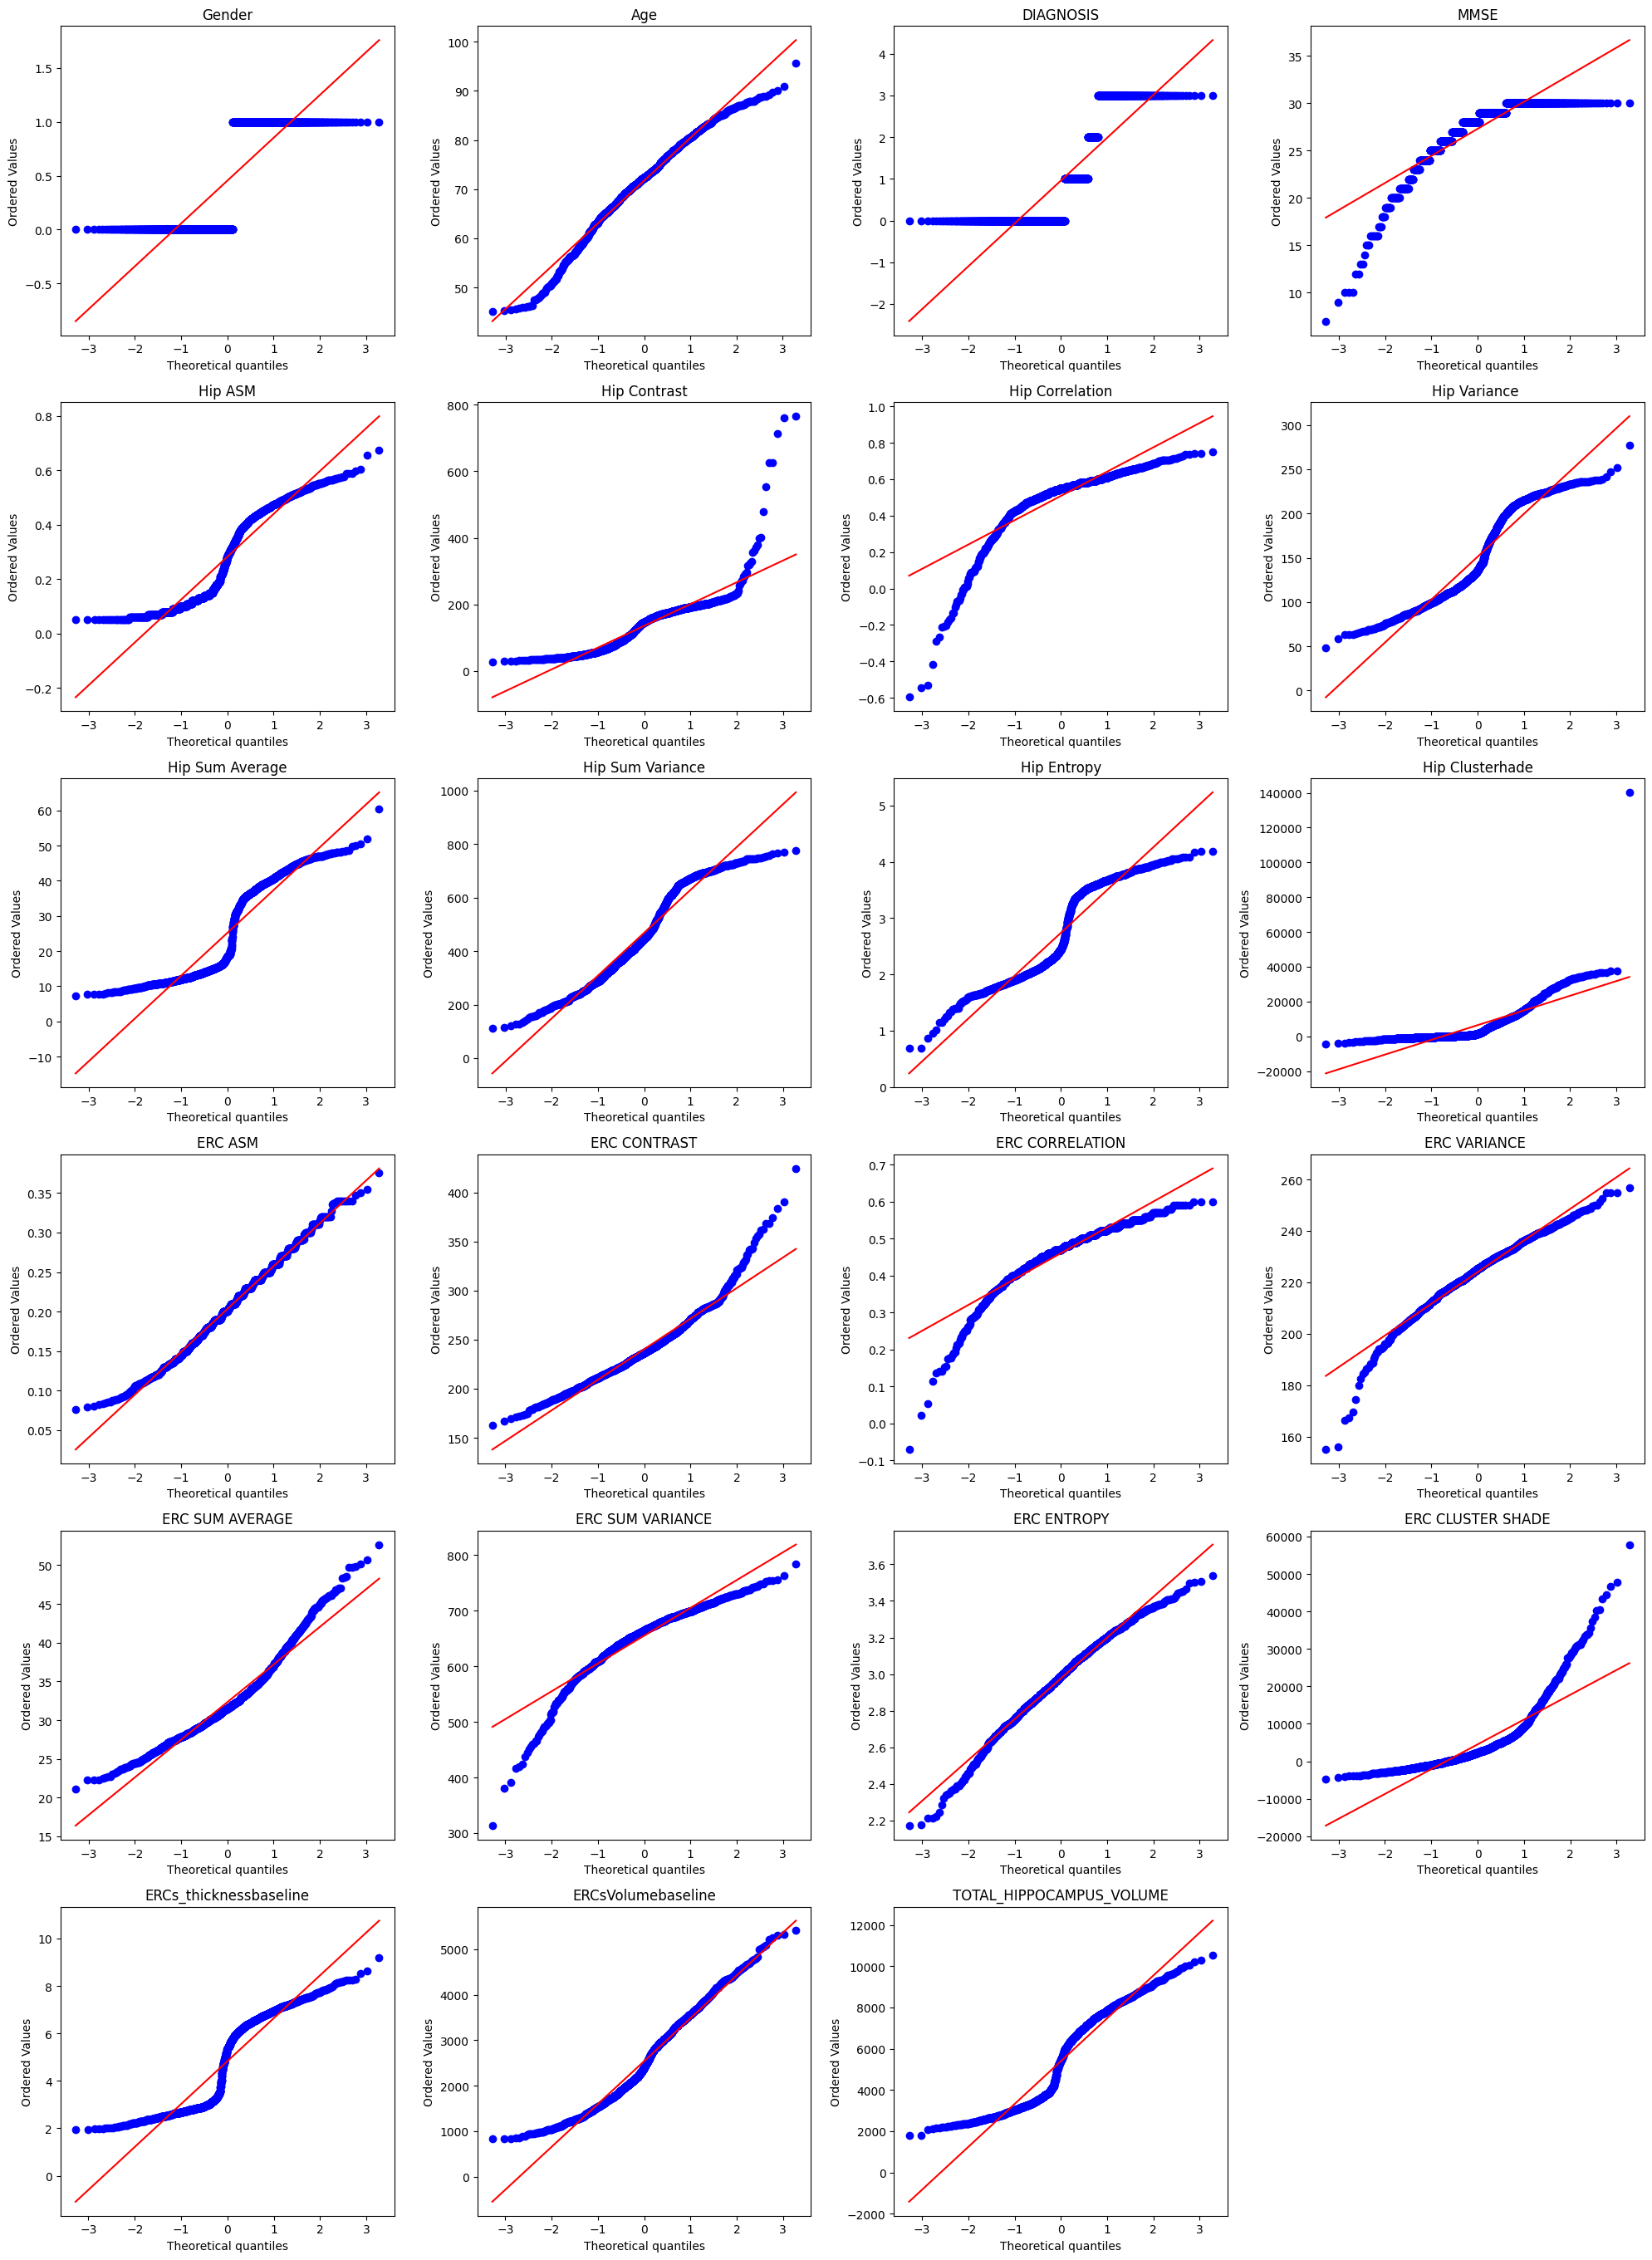

In [35]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(dataset[dataset.columns[i]].dropna(), 
                   dist='norm', plot=plt)
    plt.title(dataset.columns[i])

plt.tight_layout()

 Interesing, perhaps the distribution may change if we perform data imputation? If thats the case, then we may need to perform data transformation.

In [36]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in dataset.columns:  
    stat, p = shapiro(dataset[column].dropna())
    skewness = skew(dataset[column].dropna())
    kurt = kurtosis(dataset[column].dropna())
    results[column] = {'p-value': p, 'Normal': p > 0.05, 'Skewness': skewness, 'Kurtosis': kurt} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,p-value,Normal,Skewness,Kurtosis
Gender,0.0,False,0.183934,-1.966168
Age,0.0,False,-0.498648,0.116893
DIAGNOSIS,0.0,False,0.810449,-0.987127
MMSE,0.0,False,-2.052523,5.726335
Hip ASM,0.0,False,0.126839,-1.513555
Hip Contrast,0.0,False,2.14954,15.05457
Hip Correlation,0.0,False,-2.65382,10.378346
Hip Variance,0.0,False,0.221932,-1.371143
Hip Sum Average,0.0,False,0.302532,-1.5645
Hip Sum Variance,0.0,False,0.044314,-1.178657


C:\Users\steve\AppData\Local\Temp\ipykernel_17764\102110232.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = dataset,


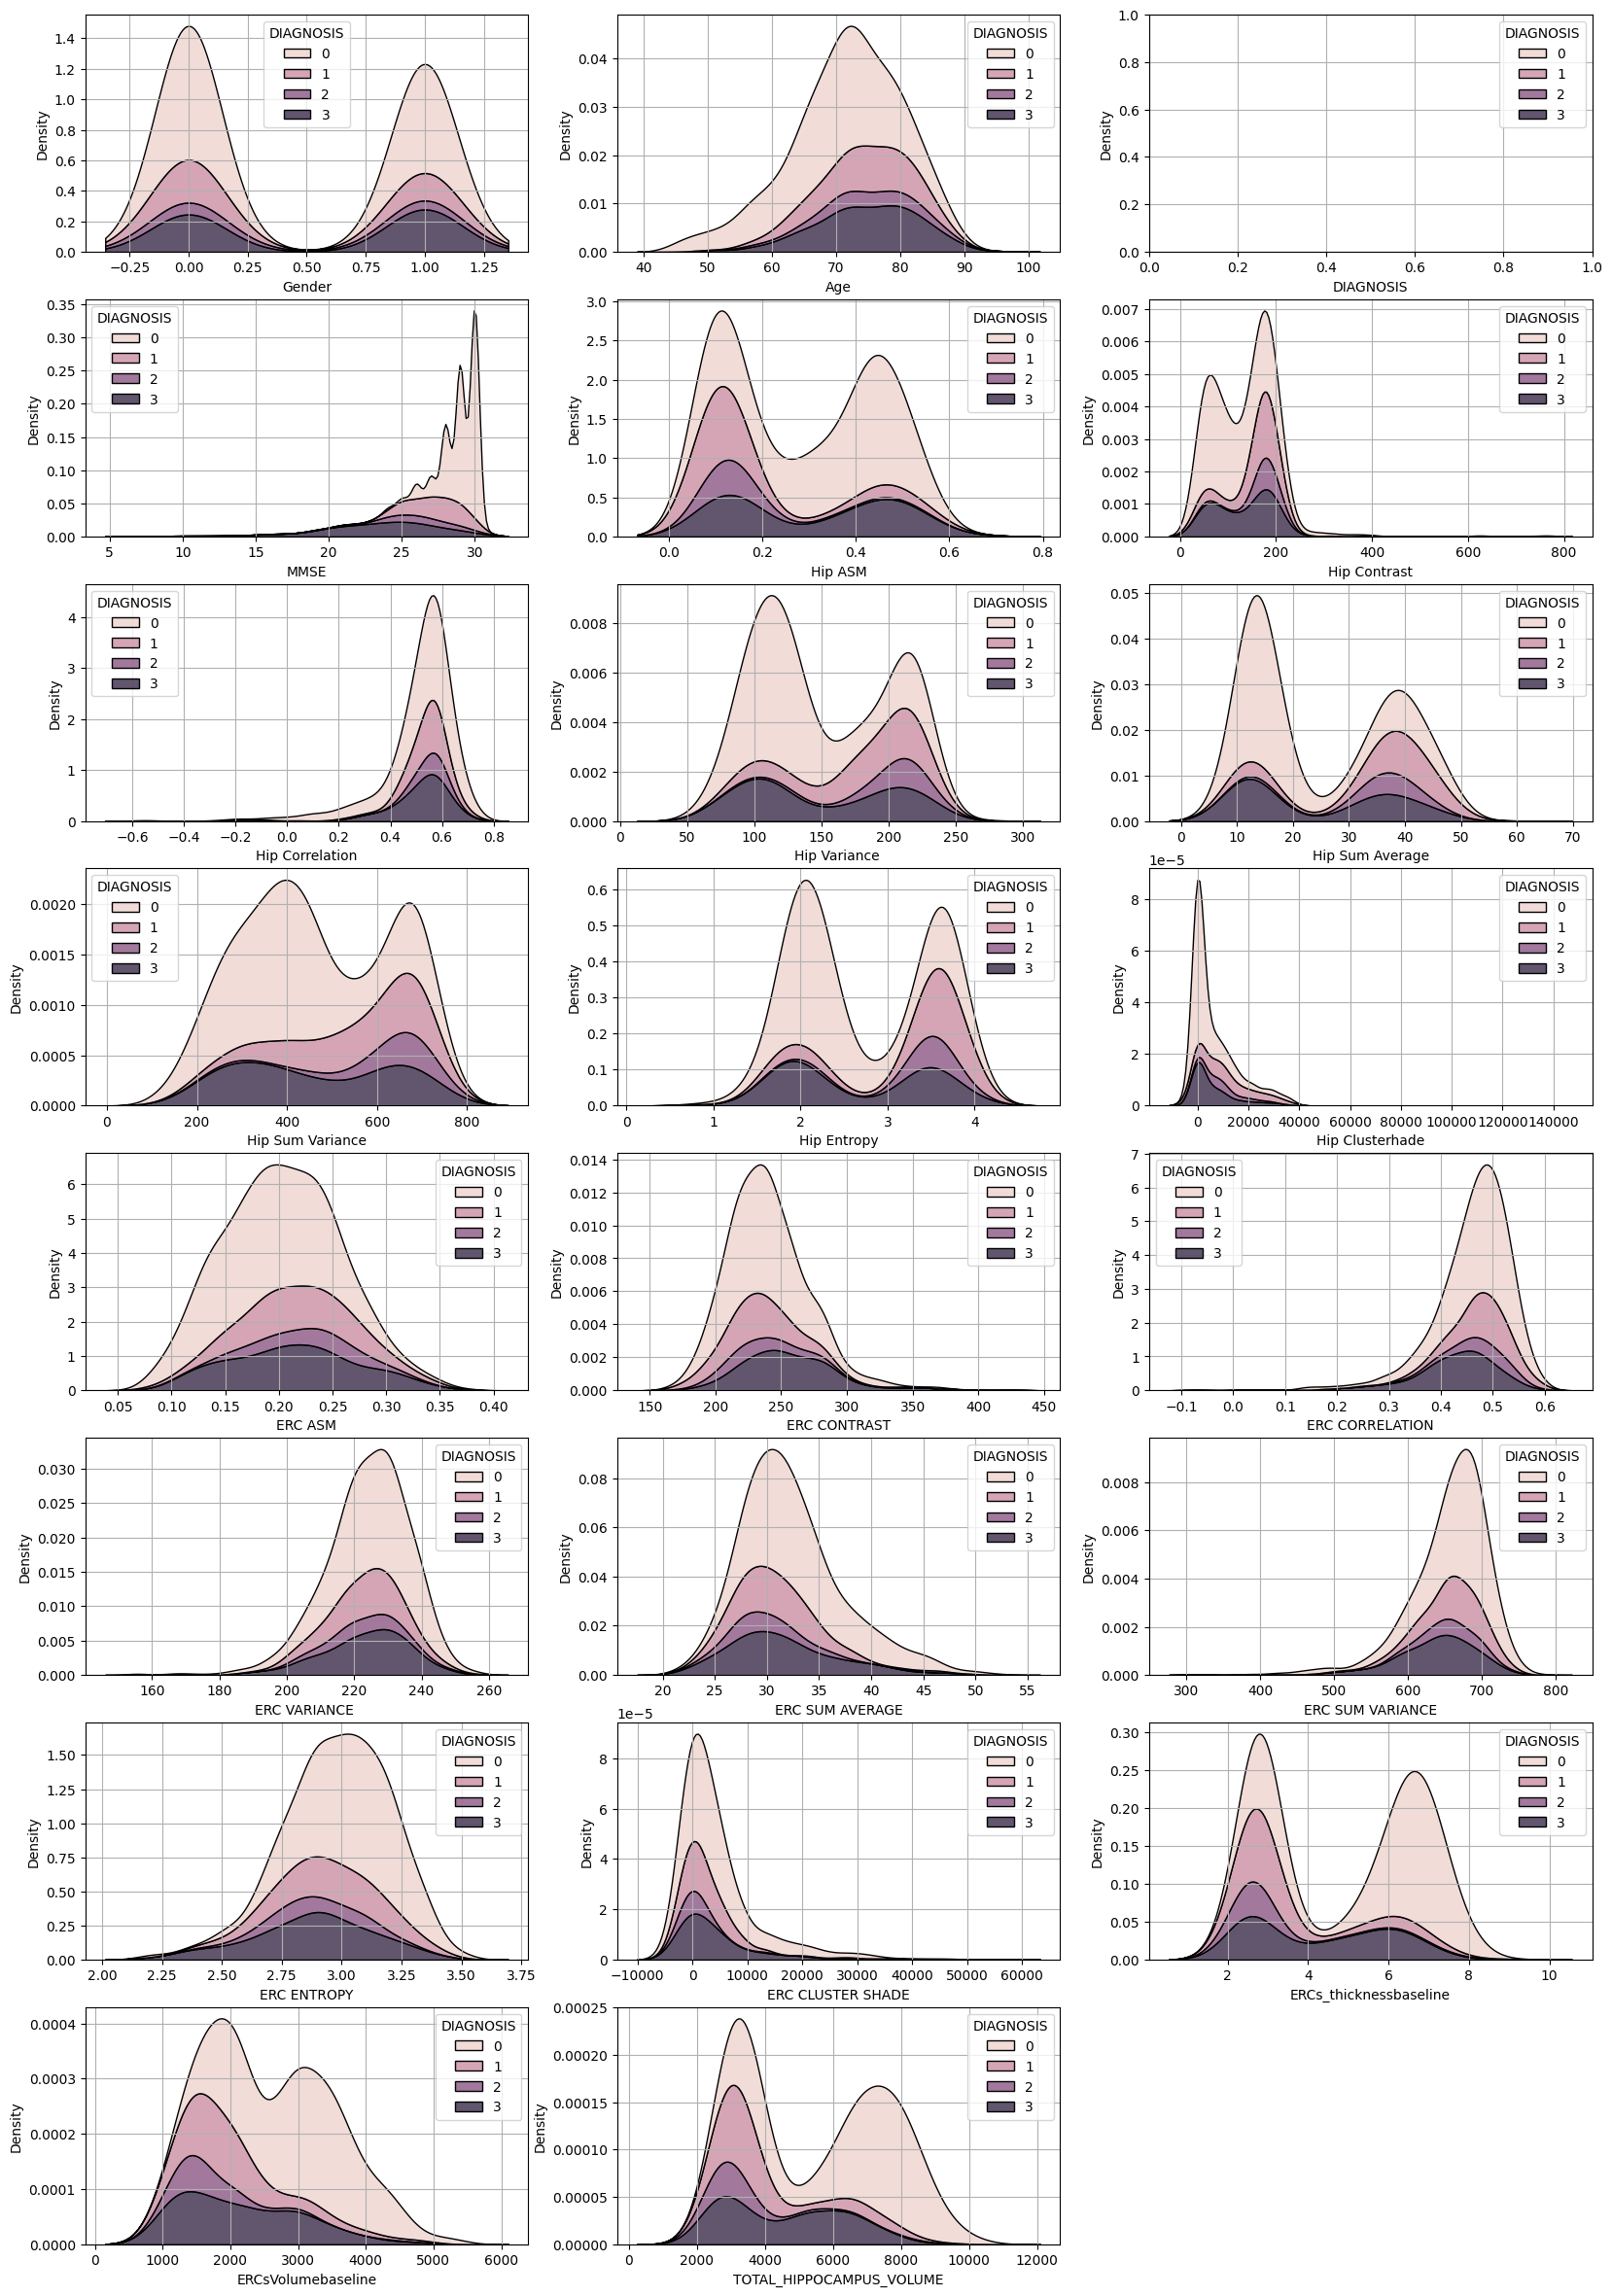

In [37]:
# Plot each column using KDE
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(data = dataset, 
                 x = dataset[dataset.columns[i]], 
                 hue = "DIAGNOSIS",
                 multiple="stack")
    plt.grid()

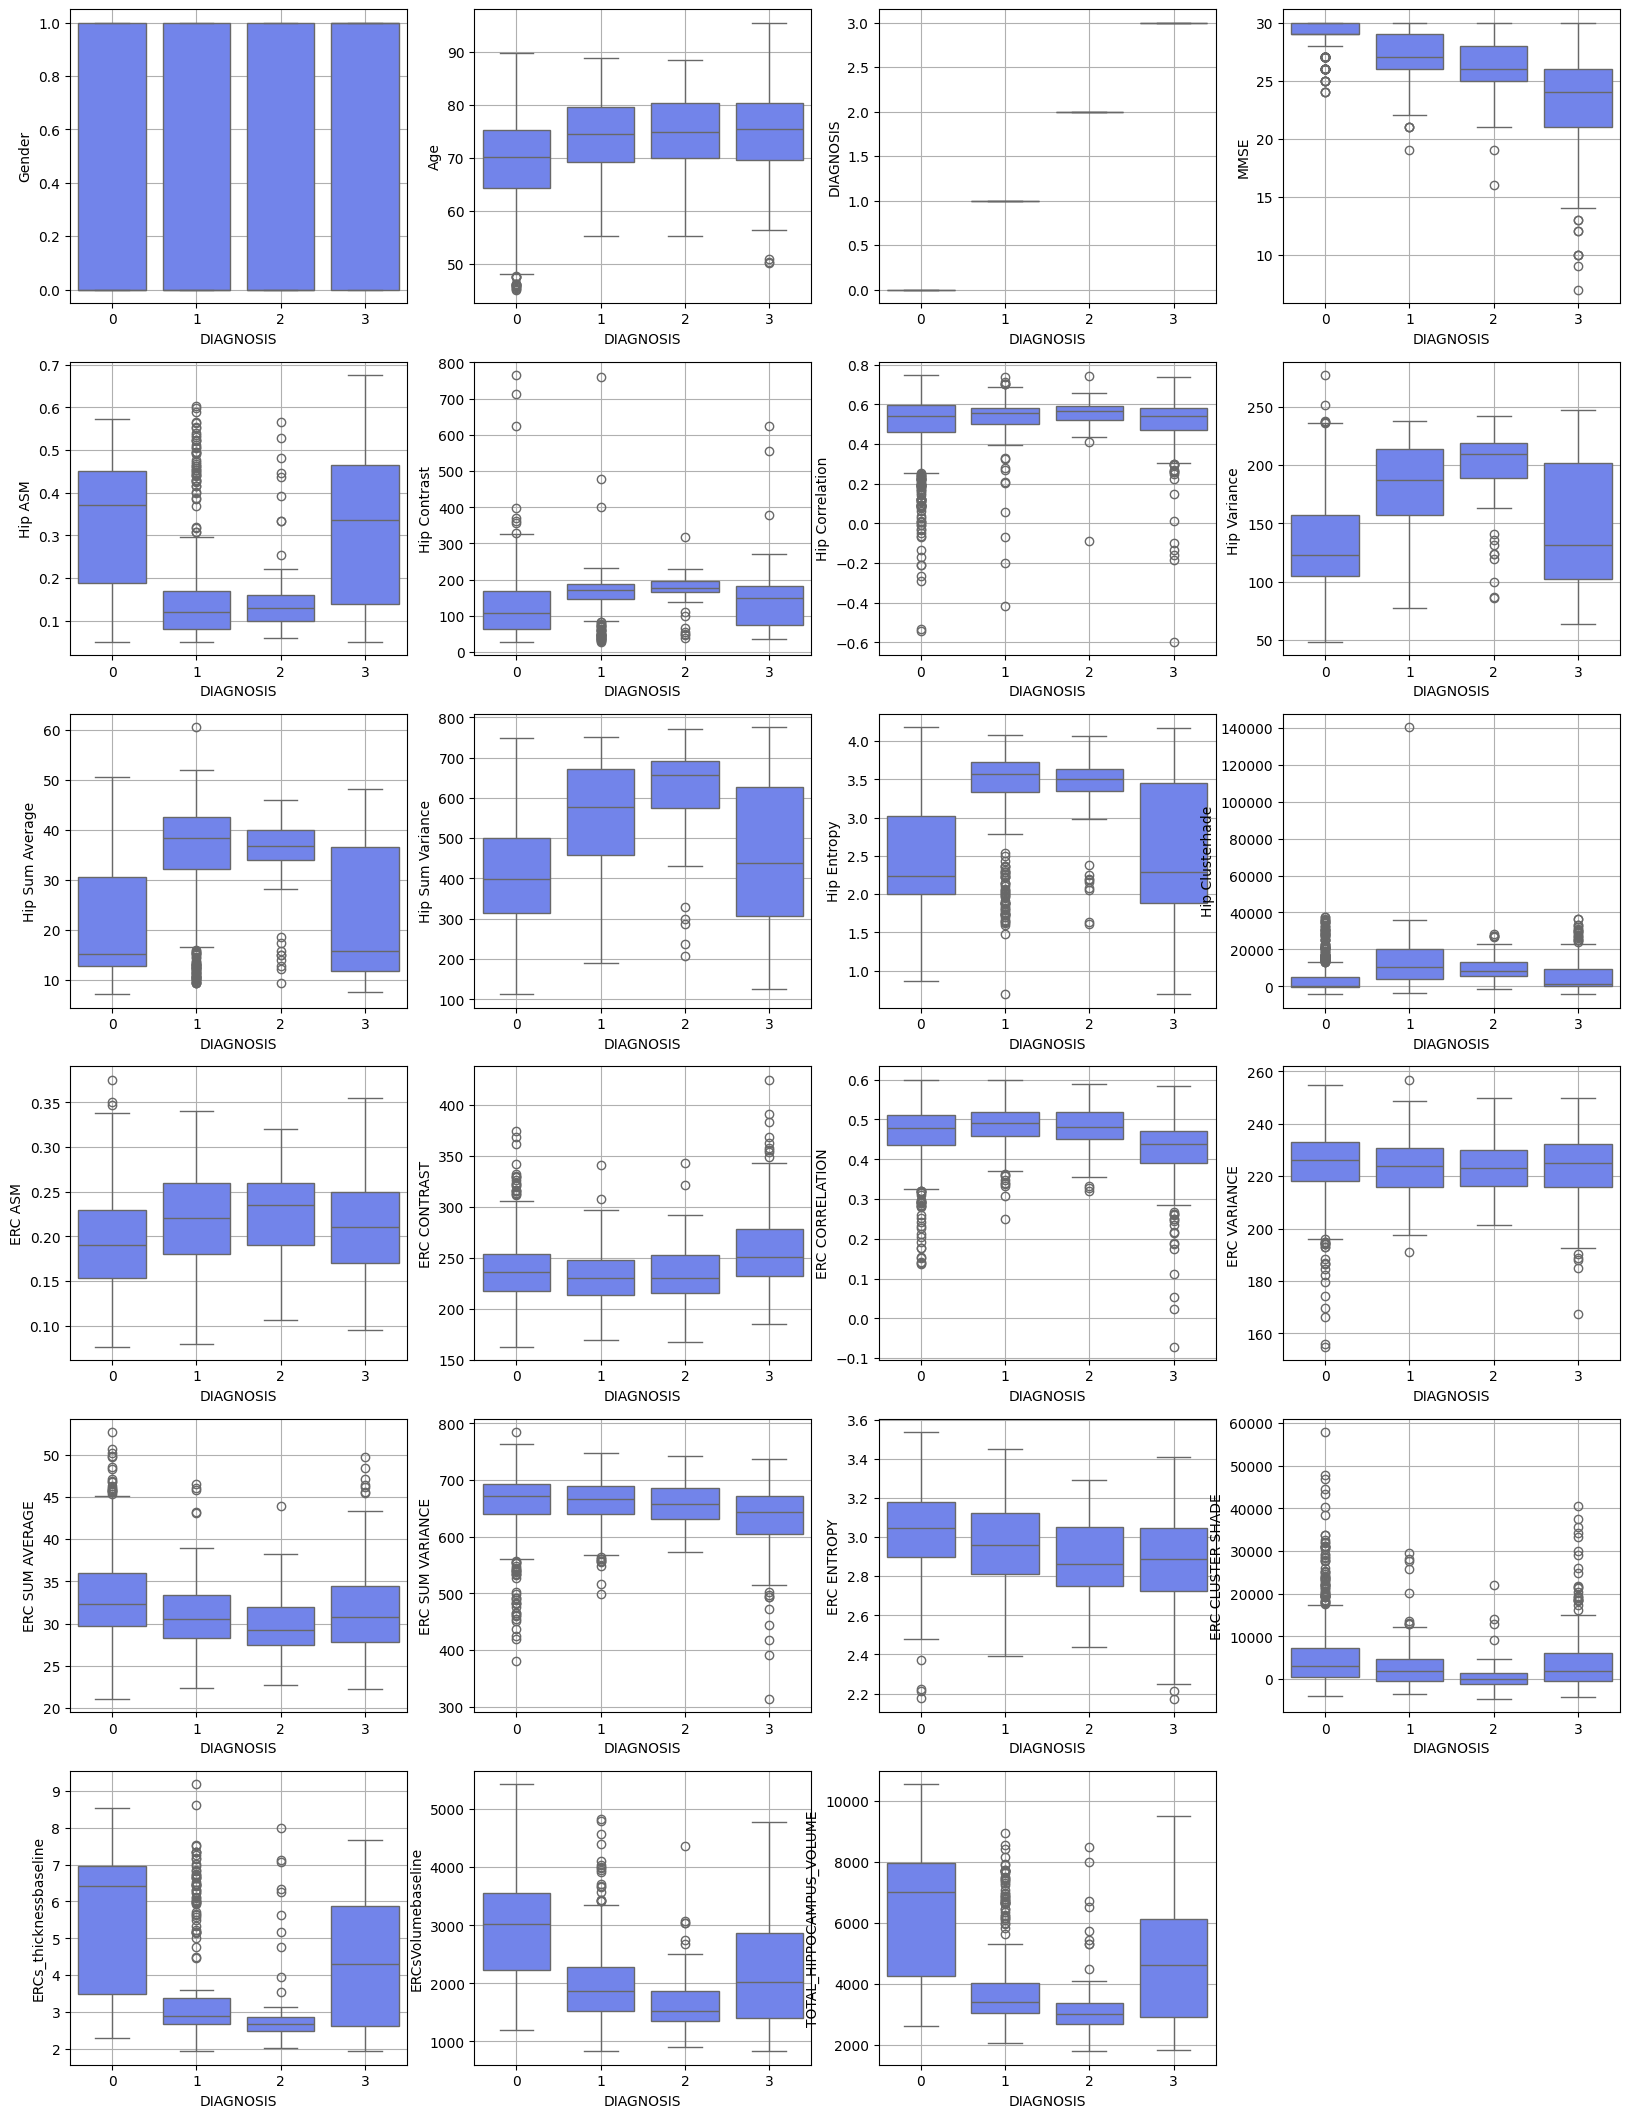

In [38]:
# Plot boxplots
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10,4,i+1)
    sns.boxplot(data = dataset,
                y = dataset[dataset.columns[i]],
                x = "DIAGNOSIS", 
                color="#5e76fe")
    plt.grid()

In [39]:
# Create a correlation dataframe
dataset_correlation = dataset.corr()
dataset_correlation

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
Gender,1.000000,0.044301,0.056626,-0.035026,0.024136,-0.031306,0.042164,-0.019512,0.011880,-0.008514,...,-0.086213,0.088317,0.002752,-0.135072,0.043501,-0.060397,-0.133792,-0.012170,0.077780,0.002392
Age,0.044301,1.000000,0.264820,-0.229770,-0.217953,0.157785,0.188769,0.354862,0.307224,0.363652,...,-0.026999,0.035832,-0.021184,-0.239446,-0.012875,-0.219966,-0.189416,-0.457143,-0.409736,-0.519316
DIAGNOSIS,0.056626,0.264820,1.000000,-0.695732,-0.116259,0.112871,0.048093,0.168827,0.151585,0.160622,...,0.201710,-0.199102,-0.054612,-0.176892,-0.181895,-0.295479,-0.104699,-0.353607,-0.396345,-0.407163
MMSE,-0.035026,-0.229770,-0.695732,1.000000,0.033164,-0.047053,-0.046495,-0.083017,-0.067105,-0.082337,...,-0.232207,0.240118,0.043734,0.125481,0.187767,0.244667,0.064365,0.258053,0.334994,0.308844
Hip ASM,0.024136,-0.217953,-0.116259,0.033164,1.000000,-0.638834,0.055290,-0.780747,-0.918861,-0.672989,...,0.376352,-0.338026,0.143232,0.265436,-0.079098,0.053797,0.235722,0.785298,0.667764,0.729172
Hip Contrast,-0.031306,0.157785,0.112871,-0.047053,-0.638834,1.000000,-0.581217,0.643635,0.632257,0.348561,...,-0.237621,0.209381,-0.093734,-0.207318,0.045626,-0.096117,-0.164871,-0.475768,-0.409345,-0.451713
Hip Correlation,0.042164,0.188769,0.048093,-0.046495,0.055290,-0.581217,1.000000,0.192551,0.062892,0.491165,...,-0.062878,0.108351,0.058160,-0.183474,0.093585,-0.122894,-0.174027,-0.198531,-0.170647,-0.211971
Hip Variance,-0.019512,0.354862,0.168827,-0.083017,-0.780747,0.643635,0.192551,1.000000,0.833637,0.942295,...,-0.362218,0.376333,-0.047508,-0.430569,0.163374,-0.234123,-0.370858,-0.799245,-0.684597,-0.766632
Hip Sum Average,0.011880,0.307224,0.151585,-0.067105,-0.918861,0.632257,0.062892,0.833637,1.000000,0.745093,...,-0.380933,0.361816,-0.110276,-0.313977,0.114119,-0.076194,-0.295016,-0.850702,-0.721865,-0.805575
Hip Sum Variance,-0.008514,0.363652,0.160622,-0.082337,-0.672989,0.348561,0.491165,0.942295,0.745093,1.000000,...,-0.341193,0.369191,-0.020913,-0.437657,0.177790,-0.245878,-0.381862,-0.766430,-0.656846,-0.738860


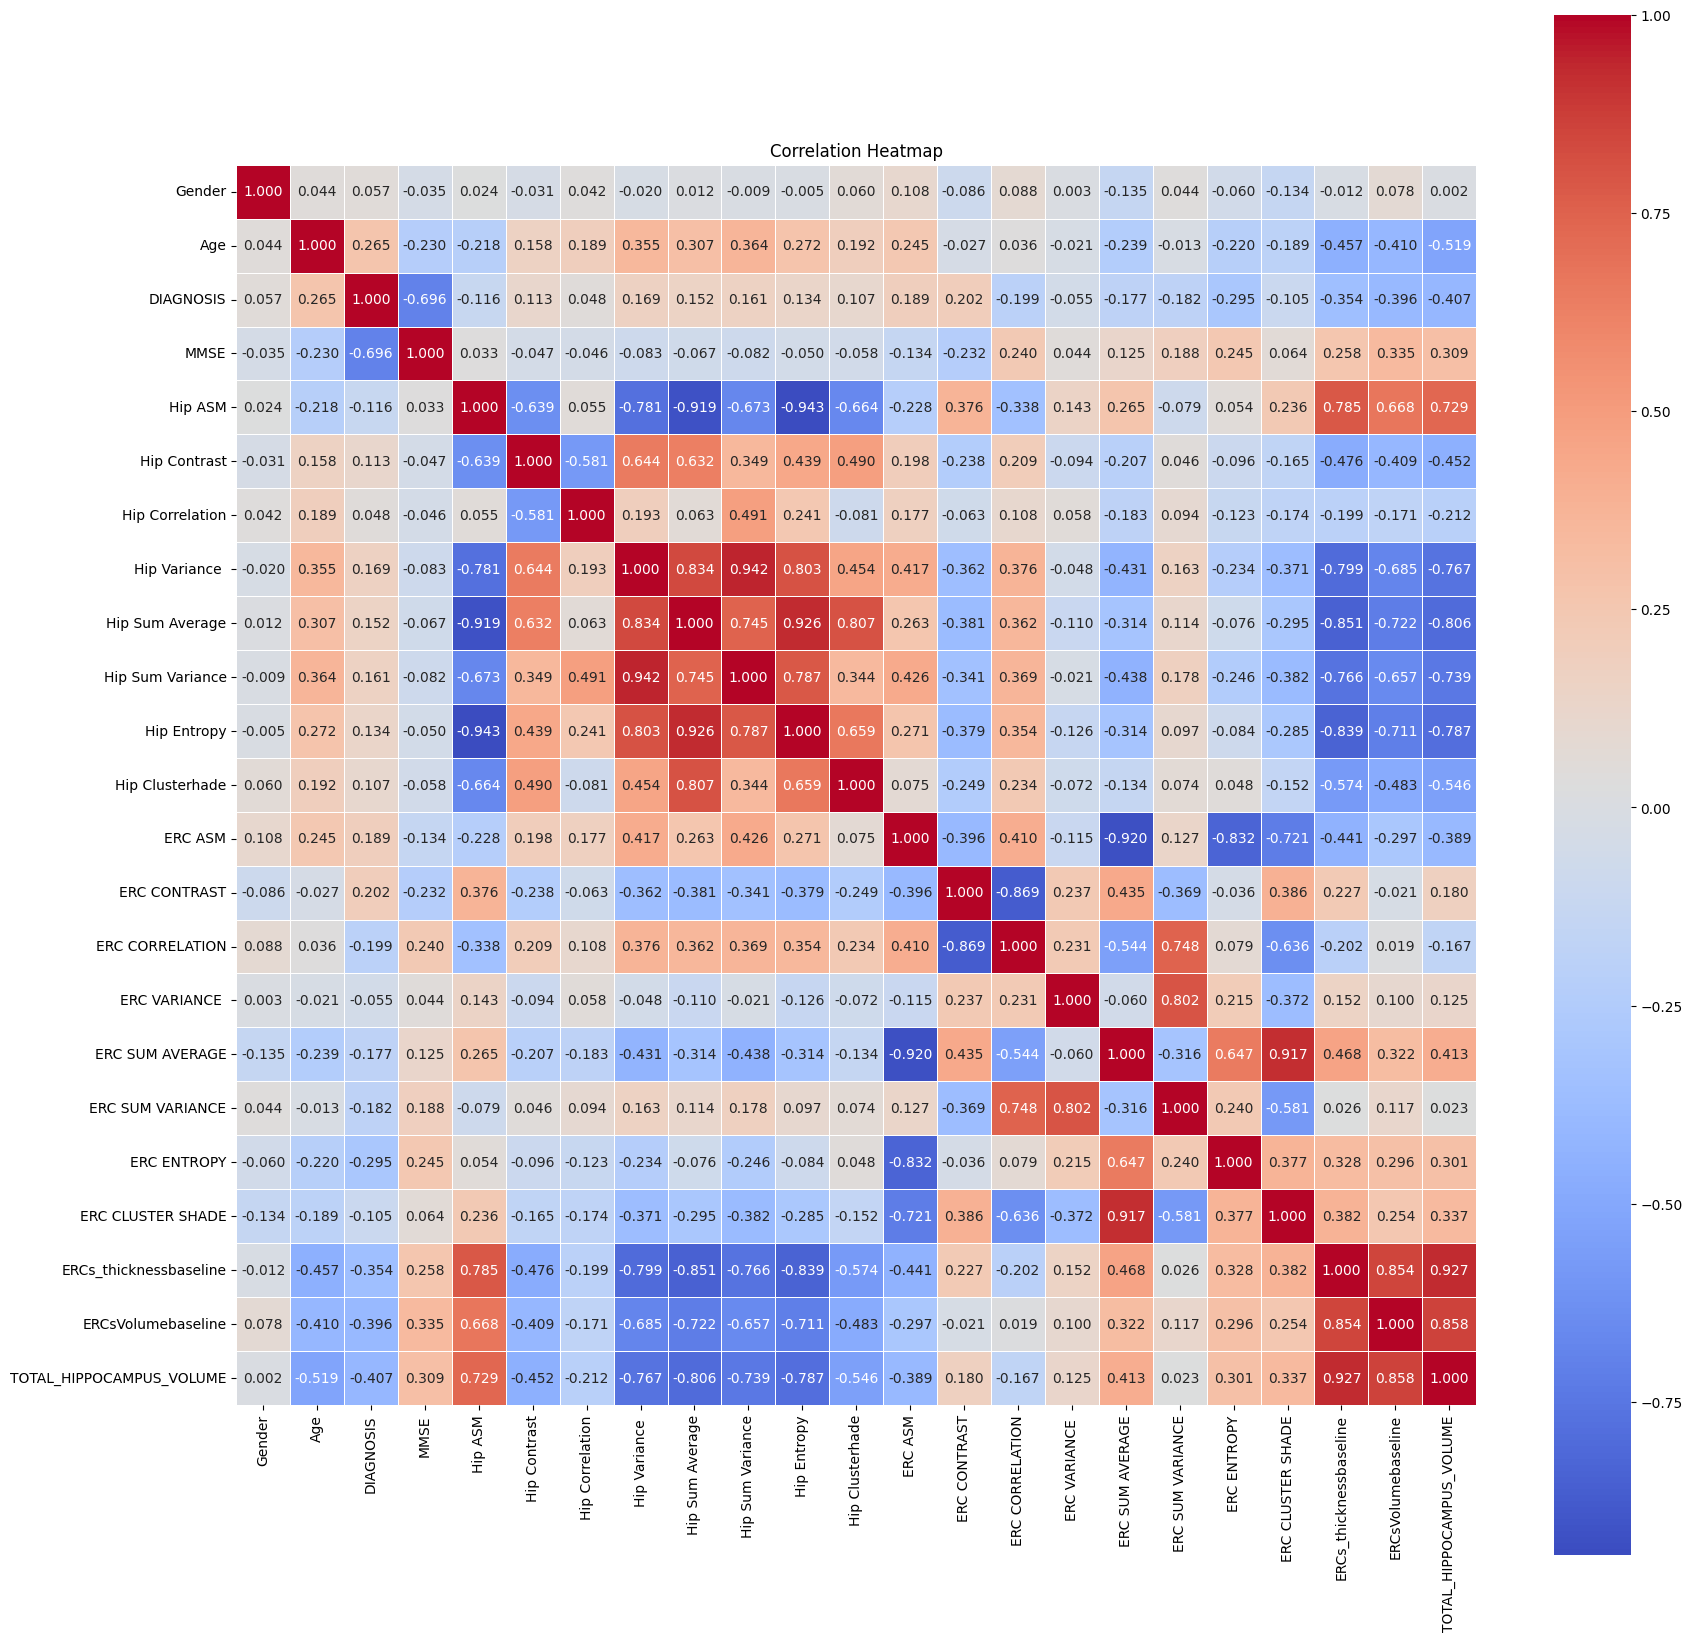

In [40]:
# Plot a heatmap
plt.figure(figsize=(20, 20))  

sns.heatmap(dataset_correlation, 
            annot = True, 
            fmt = ".3f", 
            cmap = "coolwarm",
            square = True,
            linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
correlation_pairs = pg.pairwise_corr(data = dataset)

correlation_report = correlation_pairs[correlation_pairs["r"].abs() > 0.7]

correlation_report[["X", "Y", "r"]].sort_values("r", ascending = False)

,X,Y,r
134,Hip Variance,Hip Sum Variance,0.942295
251,ERCs_thicknessbaseline,TOTAL_HIPPOCAMPUS_VOLUME,0.927432
149,Hip Sum Average,Hip Entropy,0.926015
234,ERC SUM AVERAGE,ERC CLUSTER SHADE,0.916711
252,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME,0.858473
250,ERCs_thicknessbaseline,ERCsVolumebaseline,0.853744
133,Hip Variance,Hip Sum Average,0.833637
150,Hip Sum Average,Hip Clusterhade,0.807251
135,Hip Variance,Hip Entropy,0.802920
226,ERC VARIANCE,ERC SUM VARIANCE,0.801609


## Imputation

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("DIAGNOSIS", axis=1),  
    dataset["DIAGNOSIS"],  
    test_size=0.3,  
    random_state=42,  
)

In [44]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    random_state=42,
)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(),
    random_state=42,
)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(),
    random_state=42,
)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(),
    random_state=42,
)

In [45]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)

imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(), random_state=42)

In [46]:
# replace NA
X_train_bayes = imputer_bayes.transform(X_train)
X_test_bayes = imputer_bayes.transform(X_test)

X_train_knn = imputer_knn.transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

X_train_nonLin = imputer_nonLin.transform(X_train)
X_test_nonLin = imputer_nonLin.transform(X_test)

X_train_missForest = imputer_missForest.transform(X_train)
X_test_missForest = imputer_missForest.transform(X_test)

In [47]:
X_train_bayes_t = pd.DataFrame(X_train_bayes, columns=X_train.columns)
X_test_bayes_t = pd.DataFrame(X_test_bayes, columns=X_test.columns)

X_train_knn_t = pd.DataFrame(X_train_knn, columns=X_train.columns)
X_test_knn_t = pd.DataFrame(X_test_knn, columns=X_test.columns)

X_train_nonLin_t = pd.DataFrame(X_train_nonLin, columns=X_train.columns)
X_test_nonLin_t = pd.DataFrame(X_test_nonLin, columns=X_test.columns)

X_train_missForest_t = pd.DataFrame(X_train_missForest, columns=X_train.columns)
X_test_missForest_t = pd.DataFrame(X_test_missForest, columns=X_test.columns)

In [48]:
dataframes = [
    X_train_bayes_t, X_test_bayes_t, 
    X_train_knn_t, X_test_knn_t,
    X_train_nonLin_t, X_test_nonLin_t,
    X_train_missForest_t, X_test_missForest_t,
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np

def run_random_forest(classifier_name, imp_method, X_train, y_train):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=5,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        kf = StratifiedKFold(n_splits=5,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted"), 
                   "recall": make_scorer(recall_score, average="weighted"), 
                   "f1_weighted": make_scorer(f1_score, average="weighted"),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(rf,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [round(np.mean(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        std_train = [round(np.std(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        mean_test = [round(np.mean(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        std_test = [round(np.std(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        time = round(np.mean(cross_val_results[f"fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Fit Time": time,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = rf.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [50]:
bayes_model, bayes_metrics = run_random_forest("Random Forest", "Ridge Bayes", X_train_bayes_t, y_train)
knn_model, knn_metrics = run_random_forest("Random Forest", "KNN Reg", X_train_knn_t, y_train)
nonLin_model, nonLin_metrics = run_random_forest("Random Forest", "NonLin", X_train_nonLin_t, y_train)
missForest_model, missForest_metrics = run_random_forest("Random Forest", "MissForest", X_train_missForest_t, y_train)

In [49]:
validation_df = pd.concat([bayes_metrics, knn_metrics, nonLin_metrics, missForest_metrics])
validation_df_report = validation_df.set_index(["Classifier", "Imputation", "Fit Time", "Metric"])
validation_df_report

Mean Train  \
Classifier    Imputation  Fit Time Metric                             
Random Forest Ridge Bayes 0.319    accuracy                   0.931   
                                   balanced_accuracy          0.934   
                                   precision                  0.932   
                                   recall                     0.931   
                                   f1_weighted                0.931   
                                   roc_auc_ovr_weighted       0.979   
              KNN Reg     0.370    accuracy                   0.924   
                                   balanced_accuracy          0.932   
                                   precision                  0.927   
                                   recall                     0.924   
                                   f1_weighted                0.925   
                                   roc_auc_ovr_weighted       0.978   
              NonLin      0.307    accuracy                   0.929   
                                   balanced_accuracy          0.933   
                                   precision                  0.930   
                                   recall                     0.929   
                                   f1_weighted                0.929   
                                   roc_auc_ovr_weighted       0.979   
              MissForest  0.298    accuracy                   0.931   
                                   balanced_accuracy          0.934   
                                   precision                  0.932   
                                   recall                     0.931   
                                   f1_weighted                0.931   
                                   roc_auc_ovr_weighted       0.979   

                                                         Std Train  Mean Test  \
Classifier    Imputation  Fit Time Metric                                       
Random Forest Ridge Bayes 0.319    accuracy                  0.008      0.789   
                                   balanced_accuracy         0.013      0.415   
                                   precision                 0.007      0.754   
                                   recall                    0.008      0.789   
                                   f1_weighted               0.008      0.769   
                                   roc_auc_ovr_weighted      0.002      0.863   
              KNN Reg     0.370    accuracy                  0.008      0.793   
                                   balanced_accuracy         0.011      0.417   
                                   precision                 0.007      0.759   
                                   recall                    0.008      0.793   
                                   f1_weighted               0.007      0.773   
                                   roc_auc_ovr_weighted      0.002      0.858   
              NonLin      0.307    accuracy                  0.005      0.789   
                                   balanced_accuracy         0.011      0.414   
                                   precision                 0.005      0.753   
                                   recall                    0.005      0.789   
                                   f1_weighted               0.005      0.769   
                                   roc_auc_ovr_weighted      0.001      0.857   
              MissForest  0.298    accuracy                  0.006      0.785   
                                   balanced_accuracy         0.011      0.412   
                                   precision                 0.006      0.751   
                                   recall                    0.006      0.785   
                                   f1_weighted               0.006      0.766   
                                   roc_auc_ovr_weighted      0.001      0.861   

                                                         Std Test  
Classifier    Imputation  Fit Time 

In [51]:
import time

def eval_random_forest(classifier_name, imp_method, model, X_train, X_test, y_train, y_test):
        
        start_time = time.time()
        # Get predicted probabilities for ROC AUC
        pred_train_proba = model.predict_proba(X_train)
        pred_test_proba = model.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        # Calculate metrics
        metrics_train = {
                "accuracy": round(accuracy_score(y_train, pred_train), 3),
                "balanced_accuracy": round(balanced_accuracy_score(y_train, pred_train), 3),
                "precision": round(precision_score(y_train, pred_train, average="weighted"), 3),
                "recall": round(recall_score(y_train, pred_train, average="weighted"), 3),
                "f1_weighted": round(f1_score(y_train, pred_train, average="weighted"), 3),
                "roc_auc_ovr_weighted": round(roc_auc_score(y_train, pred_train_proba, average="weighted", multi_class="ovr"),3,),
        }
        
        metrics_test = {
                "accuracy": round(accuracy_score(y_test, pred_test), 3),
                "balanced_accuracy": round(balanced_accuracy_score(y_test, pred_test), 3),
                "precision": round(precision_score(y_test, pred_test, average="weighted"), 3),
                "recall": round(recall_score(y_test, pred_test, average="weighted"), 3),
                "f1_weighted": round(f1_score(y_test, pred_test, average="weighted"), 3),
                "roc_auc_ovr_weighted": round(roc_auc_score(y_test, pred_test_proba, average="weighted", multi_class="ovr"),3,),
        }
                
        elapsed_time = time.time() - start_time
    
        # Create the DataFrame without additional rounding
        pred_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Classification Time": round(elapsed_time, 3),
                "Metric": metrics_train.keys(),
                "Train data": metrics_train.values(),
                "Test data": metrics_test.values(),
    })
        
        return pred_metrics_df

In [52]:
pred_bayes = eval_random_forest("Random Forest", "Ridge Bayes", bayes_model, X_train_bayes_t, X_test_bayes_t, y_train, y_test)
pred_knn = eval_random_forest("Random Forest", "KNN Reg", knn_model, X_train_knn_t, X_test_knn_t, y_train, y_test)
pred_nonLin = eval_random_forest("Random Forest", "NonLin", nonLin_model, X_train_nonLin_t, X_test_nonLin_t, y_train, y_test)
pred_missForest = eval_random_forest("Random Forest", "MissForest", missForest_model, X_train_missForest_t, X_test_missForest_t, y_train, y_test)


In [53]:
prediction_df = pd.concat([pred_bayes, pred_knn, pred_nonLin, pred_missForest])
prediction_df_report = prediction_df.set_index(["Classifier", "Imputation",	"Classification Time", "Metric"])
prediction_df_report

Train data  \
Classifier    Imputation  Classification Time Metric                             
Random Forest Ridge Bayes 0.203               accuracy                   0.740   
                                              balanced_accuracy          0.751   
                                              precision                  0.783   
                                              recall                     0.740   
                                              f1_weighted                0.752   
                                              roc_auc_ovr_weighted       0.941   
              KNN Reg     0.116               accuracy                   0.740   
                                              balanced_accuracy          0.763   
                                              precision                  0.785   
                                              recall                     0.740   
                                              f1_weighted                0.752   
                                              roc_auc_ovr_weighted       0.942   
              NonLin      0.118               accuracy                   0.743   
                                              balanced_accuracy          0.755   
                                              precision                  0.786   
                                              recall                     0.743   
                                              f1_weighted                0.755   
                                              roc_auc_ovr_weighted       0.941   
              MissForest  0.099               accuracy                   0.747   
                                              balanced_accuracy          0.760   
                                              precision                  0.788   
                                              recall                     0.747   
                                              f1_weighted                0.758   
                                              roc_auc_ovr_weighted       0.943   

                                                                    Test data  
Classifier    Imputation  Classification Time Metric                           
Random Forest Ridge Bayes 0.203               accuracy                  0.708  
                                              balanced_accuracy         0.654  
                                              precision                 0.739  
                                              recall                    0.708  
                                              f1_weighted               0.719  
                                              roc_auc_ovr_weighted      0.896  
              KNN Reg     0.116               accuracy                  0.713  
                                              balanced_accuracy         0.680  
                                              precision                 0.754  
                                              recall                    0.713  
                                              f1_weighted               0.726  
                                              roc_auc_ovr_weighted      0.898  
              NonLin      0.118               accuracy                  0.705  
                                              balanced_accuracy         0.640  
                                              precision                 0.741  
                                              recall                    0.705  
                                              f1_weighted               0.718  
                                              roc_auc_ovr_weighted      0.896  
              MissForest  0.099               accuracy                  0.705  
                                              balanced_accuracy         0.655  
                                              precision                 0.744  
                                              recall                    0.705  
               

## Evaluation

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os

from sklearn.pipeline import Pipeline
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, RecursiveFeatureElimination

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

import xgboost as xgb
from xgboost import XGBClassifier
from ngboost import NGBClassifier
from ngboost.distns import k_categorical

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def run_model(classifier_name, X_train, y_train):
        
        columns = len(X_train.columns)
        
        # Initialize the model based on classifier_name
        if classifier_name == "Random Forest":
                model = RandomForestClassifier(n_estimators=100, 
                                        max_depth=5, 
                                        random_state=42, 
                                        class_weight="balanced")
                
        elif classifier_name == "XGBoost":
        # XGBClassifier sometimes issues warnings about label encoding. 
        # We disable the use_label_encoder and set an evaluation metric.
                model = XGBClassifier(n_estimators=100, 
                                max_depth=5, 
                                random_state=42,
                                eval_metric="logloss")
        
        elif classifier_name == "NGBoost":
                model = NGBClassifier(Dist=k_categorical(len(np.unique(y_train))),
                                      n_estimators=100,
                                      verbose=False)
                
        elif classifier_name == "Logistic Regression":
                model = LogisticRegression(
                class_weight="balanced",
                solver="lbfgs",
                max_iter=500,
                random_state=42
                )
                
                # Scale features
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)

        else:
                raise ValueError("Unknown classifier")
                
        kf = StratifiedKFold(n_splits=5,
                             shuffle=True,
                             random_state=42,
        )
        
        cross_val_results = cross_validate(model,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring="balanced_accuracy",
                                           return_train_score=True,
        )
               
        # Calculate the metrics for training and testing
        mean_train = [round(np.mean(cross_val_results["train_score"]), 3)]
        std_train = [round(np.std(cross_val_results["train_score"]), 3)]
        mean_test = [round(np.mean(cross_val_results["test_score"]), 3)]
        std_test = [round(np.std(cross_val_results["test_score"]), 3)]
        time = round(np.mean(cross_val_results["fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Fit Time": time,
                "Total Features": columns,
                "Metric": "balanced_accuracy",
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = model.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [56]:
trained_rf_n, metrics_rf_n = run_model("Random Forest", X_train_knn_t, y_train)

trained_xgb_n, metrics_xgb_n = run_model("XGBoost", X_train_knn_t, y_train)

trained_ngb_n, metrics_ngb_n = run_model("NGBoost", X_train_knn_t, y_train)

trained_lg_n, metrics_lg_n = run_model("Logistic Regression", X_train_knn_t, y_train)

In [57]:
validation_df = pd.concat([metrics_rf_n, metrics_xgb_n, metrics_ngb_n, metrics_lg_n])
validation_df_report = validation_df.set_index(["Classifier", "Metric", "Fit Time", "Total Features"])
validation_df_report

,,,,Mean Train,Std Train,Mean Test,Std Test
Classifier,Metric,Fit Time,Total Features,,,,
Random Forest,balanced_accuracy,0.462,22,0.786,0.008,0.592,0.026
XGBoost,balanced_accuracy,0.900,22,1.000,0.000,0.581,0.034
NGBoost,balanced_accuracy,3.607,22,0.614,0.028,0.510,0.021
Logistic Regression,balanced_accuracy,0.075,22,0.629,0.016,0.573,0.025


In [58]:
import time

def eval_model(classifier_name, model, X_train, X_test, y_train, y_test):
        
        start_time = time.time()
        columns = len(X_train.columns)
        
        if classifier_name == "Logistic Regression":  
                # Scale features
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.fit_transform(X_test)

        # Get predicted probabilities for ROC AUC
        pred_train_proba = model.predict_proba(X_train)
        pred_test_proba = model.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        # Calculate metrics
        metrics_train = {
                "accuracy": round(accuracy_score(y_train, pred_train), 3),
                "balanced_accuracy": round(balanced_accuracy_score(y_train, pred_train), 3),
                "precision": round(precision_score(y_train, pred_train, average="weighted"), 3),
                "recall": round(recall_score(y_train, pred_train, average="weighted"), 3),
                "f1_weighted": round(f1_score(y_train, pred_train, average="weighted"), 3),
                "roc_auc_ovr_weighted": round(roc_auc_score(y_train, pred_train_proba, average="weighted", multi_class="ovr"),3,),
        }
        
        metrics_test = {
                "accuracy": round(accuracy_score(y_test, pred_test), 3),
                "balanced_accuracy": round(balanced_accuracy_score(y_test, pred_test), 3),
                "precision": round(precision_score(y_test, pred_test, average="weighted"), 3),
                "recall": round(recall_score(y_test, pred_test, average="weighted"), 3),
                "f1_weighted": round(f1_score(y_test, pred_test, average="weighted"), 3),
                "roc_auc_ovr_weighted": round(roc_auc_score(y_test, pred_test_proba, average="weighted", multi_class="ovr"),3,),
        }
                
        elapsed_time = time.time() - start_time
    
        # Create the DataFrame without additional rounding
        pred_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Classification Time": round(elapsed_time, 3),
                "Total Features": columns,
                "Metric": metrics_train.keys(),
                "Train data": metrics_train.values(),
                "Test data": metrics_test.values(),
    })
        
        return pred_metrics_df

In [61]:
results = "all"
prediction_df_report = None

if results == "all":
    pred_rf_n = eval_model("Random Forest", trained_rf_n, X_train_knn_t, X_test_knn_t, y_train, y_test)

    pred_xgb_n = eval_model("XGBoost", trained_xgb_n, X_train_knn_t, X_test_knn_t, y_train, y_test)

    pred_ngb_n = eval_model("NGBoost", trained_ngb_n, X_train_knn_t, X_test_knn_t, y_train, y_test)
    
    pred_lg_n = eval_model("Logistic Regression", trained_lg_n, X_train_knn_t, X_test_knn_t, y_train, y_test)
    
    prediction_df = pd.concat([pred_rf_n, pred_xgb_n, pred_ngb_n, pred_lg_n])
    prediction_df_report = prediction_df.set_index(["Classifier", "Classification Time", "Total Features", "Metric"])

prediction_df_report

Train data  \
Classifier          Classification Time Total Features Metric                             
Random Forest       0.268               22             accuracy                   0.740   
                                                       balanced_accuracy          0.763   
                                                       precision                  0.785   
                                                       recall                     0.740   
                                                       f1_weighted                0.752   
                                                       roc_auc_ovr_weighted       0.942   
XGBoost             0.309               22             accuracy                   1.000   
                                                       balanced_accuracy          1.000   
                                                       precision                  1.000   
                                                       recall                     1.000   
                                                       f1_weighted                1.000   
                                                       roc_auc_ovr_weighted       1.000   
NGBoost             0.574               22             accuracy                   0.772   
                                                       balanced_accuracy          0.590   
                                                       precision                  0.771   
                                                       recall                     0.772   
                                                       f1_weighted                0.750   
                                                       roc_auc_ovr_weighted       0.948   
Logistic Regression 0.049               22             accuracy                   0.682   
                                                       balanced_accuracy          0.633   
                                                       precision                  0.729   
                                                       recall                     0.682   
                                                       f1_weighted                0.698   
                                                       roc_auc_ovr_weighted       0.893   

                                                                             Test data  
Classifier          Classification Time Total Features Metric                           
Random Forest       0.268               22             accuracy                  0.713  
                                                       balanced_accuracy         0.680  
                                                       precision                 0.754  
                                                       recall                    0.713  
                                                       f1_weighted               0.726  
                                                       roc_auc_ovr_weighted      0.898  
XGBoost             0.309               22             accuracy                  0.690  
                                                       balanced_accuracy         0.513  
                                                       precision                 0.669  
                                                       recall                    0.690  
                                                       f1_weighted               0.671  
                                                       roc_auc_ovr_weighted      0.879  
NGBoost             0.574               22             accuracy                  0.722  
                                                       balanced_accuracy         0.529  
                                                       precision                 0.684  
                                                       recall                    0.722  
                                                       f1_weighted               0.694  
                   